## SNR tests

The Annecy 2022 event will be chosen as an example to investigate precisely the SNR calculation, and based on this the filtering of stations prior to any further processing.

Generally body wave phase picks are defined by their velocity or tauPy picker, for the Lg wave there is a velocity window set, which is why the windows have different lengths.

We will investigate in this the different SNR of different phases, check how the decrease in SNR behaves over distance, and find two regimes which can be set. Subsequently, we will see how the cutoff distance behaves, and if the coda window, which is set based on this cutoff distance, is adequate (plot traces with time window marked.)

#### Defining variables and reading in data for event

In [1]:
from obspy import UTCDateTime

minlat = 37
maxlat = 50.0
minlon = -5
maxlon = 17




minmag = 3.5
Dtmin_Noise=-25
Dtmax_Noise=-5
Dtmin_Pn=-5.
Dtmax_Pn=10.
Dtmin_Sn=-5.
Dtmax_Sn=10.

vLg_max=3.5
vLg_min=3.1
vLg=0.5*(vLg_max+vLg_min)
vPg_max=6.2
vPg_min=5.2
vPg=0.5*(vPg_max+vPg_min)
#vPg=6.

tminCoda=300.
tmaxCoda=320.

In [8]:

event_name='Rhone Valley' # quite good Lg wave arrivals, however velocity not well defined
event_name='Adriatic' # a regarder
event_name='Appennines'#data?
event_name='Vierzon' #data?
event_name='LaRochelle_X7west'
event_name='Genova' #data?
event_name='Friul' 
event_name='France_west' # newly added
event_name='France_Rochemaure' # newly added
event_name='France_X7center'  #data?
event_name='Spain_3_X7west' #data?
event_name='Spain_1_X7west'
event_name='France_east_2014' #newly added
event_name='Massif Central' # a regarder
event_name='France_east_2012' #newly added
event_name='France_north_east_2003' #newly added
event_name='Annecy_2022' # newly added


if event_name == 'France_north_east_2003':
    start = UTCDateTime("2003-02-22T20:31:03")
    end = UTCDateTime("2003-02-22T20:51:03")

if event_name == 'France_east_2012':
    start = UTCDateTime("2012-03-02T07:10:50 ")
    end = UTCDateTime("2012-03-02T08:10:50 ")





if event_name == 'France_east_2014':
    start = (UTCDateTime("2014-04-07T19:20:00"))
    end = (UTCDateTime("2014-04-07T20:20:00"))


if event_name == 'Spain_1_X7west'  :
    start = UTCDateTime("2013-01-09") #Spain_1_X7west M3.7
    end = UTCDateTime("2013-01-10")   #

if event_name == 'Spain_3_X7west'  :
    start = UTCDateTime("2013-04-04") #Spain_3_X7west M3.9
    end = UTCDateTime("2013-04-05")   #


if event_name == 'France_X7center'  :
    start = UTCDateTime("2014-01-25") #France_X7center M3.9
    end = UTCDateTime("2014-01-26")   #



if event_name == 'France_Rochemaure' :
    start = UTCDateTime("2019-11-11 10:50:46 ") #magnitude 4.9
    end = UTCDateTime("2019-11-11 10:55:46 ")


if event_name == 'France_west'  :
    start = UTCDateTime("2013-11-21 09:50:06") #France_west M3.7
    end = UTCDateTime("2013-11-21 10:00:06")   #


if event_name == 'Genova'  :
    start = UTCDateTime("2022-02-28") #Genova event
    end = UTCDateTime("2022-03-01")   #Genova event M4.0


if event_name == 'LaRochelle_X7west'  :
    start = UTCDateTime("2013-03-06") #LaRochelle_X7west M3.8
    end = UTCDateTime("2013-03-07")   #

if event_name == 'Friul' :
    start = UTCDateTime("2024-03-27T21:06:00")   #Friul M4.5 event
    end = UTCDateTime("2024-03-27T22:08:00") #Friul M4.5 event



if event_name == 'Appennines' :
    start = UTCDateTime("2022-02-01T22:06:00")   #Appennines M3.7 event
    end = UTCDateTime("2022-02-01T23:08:00") #Appennines M3.7 event



if event_name == 'Vierzon'  :
    start = UTCDateTime("2013-09-25") #Vierzon
    end = UTCDateTime("2013-09-26")   #
    


if event_name == 'Adriatic' :
    start = UTCDateTime("2022-11-09T06:06:00")   #Adriatic M5.6event
    end = UTCDateTime("2022-11-09T06:08:00") #Adriatic M5.6 event

if event_name == 'Annecy_2022'  :
    start = UTCDateTime("2022-03-12 17:00:22 ") #Annecy 2022 event M4.2
    end = UTCDateTime("2022-03-12 17:13:22 ")

if event_name == 'Massif Central' :
    start = UTCDateTime("2022-05-09T11:11:00")   #massif central
    end = UTCDateTime("2022-05-09T11:16:00") #massif central M4.0

if event_name == 'Rhone Valley' :
    start = UTCDateTime("2019-11-11")   #rhone valley event
    end = UTCDateTime("2019-11-12") #rhone valley event

events_list = Client("USGS").get_events(
    minlatitude=minlat,
    maxlatitude=maxlat,
    minlongitude=minlon,
    maxlongitude=maxlon,
    minmagnitude=minmag,
    starttime=start,
    endtime=end
)
print("\nFound %s event(s) from EMSC Data Center:\n" % len(events_list))
print(events_list.__str__(print_all=True))



eqo = events_list[0].origins[0]
eq_start = eqo.time
print(type(eq_start))
t_duration=500. #length of window to request
eq_end = eq_start + t_duration
eq_lat=eqo.latitude
print((eq_end))
eq_lon=eqo.longitude
eq_epi=(eq_lat,eq_lon)
degmin=1.9
degmax=10.
start = eq_start
end = eq_end
datacenters=['RESIF','ODC','ETH','INGV','GEOFON','BGR', 'IRIS', 'ICGC']
st_all, stations_all, plot = big_downloader2(datacenters,start,end,eq_lon,eq_lat,degmin,degmax,directory='/home/schreinl/Stage/Data/',plot=True)
plot


Found 1 event(s) from EMSC Data Center:

1 Event(s) in Catalog:
2022-03-12T17:03:22.558000Z | +45.717,   +6.286 | 4.5  mb | manual
<class 'obspy.core.utcdatetime.UTCDateTime'>
2022-03-12T17:11:42.558000Z
Earthquake at 2022-03-12T17:03:22.558000Z with magnitude 4.5


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 26.10it/s]


#### Applying a bandpass filter


In [9]:
fmin=3
fmax=6
f0=0.5*(fmin+fmax)

st_plot_filt_all=st_all.copy()
st_plot_filt_all.filter("bandpass", freqmin=fmin, freqmax=fmax)
print((st_plot_filt_all))

825 Trace(s) in Stream:

FR.ABJF.00.HHZ | 2022-03-12T17:03:22.560000Z - 2022-03-12T17:11:42.550000Z | 100.0 Hz, 50000 samples
...
(823 other traces)
...
CA.CCAS..HHZ | 2022-03-12T17:03:22.560000Z - 2022-03-12T17:11:42.550000Z | 100.0 Hz, 50000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


### Now start the SNR testing

First running SNR_all, which does all the processing steps, putting out the SNR ratios with the station info in form (net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, SNR_Pn, SNR_Pg, SNR_Sn, SNR_Lg), as well as the filtered stations with their amplitudes in form (net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg).

In [11]:

filtered_stations_with_SNR, stations_with_snr, distance_dict, tcoda_test, filtered_st, stations_with_amps, amp_plot = SNR_all(stations_all, st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda,
         Dtmin_Noise, Dtmax_Noise,eq_start,eq_lat,eq_lon,plot_SNR=False,plot_amps=True, wavecode="Lg_Coda",dB=False)
print(tcoda_test)
amp_plot


calculating SNR for Pn  phase


/tmp/ipykernel_3831/2590964986.py:674: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn)
/tmp/ipykernel_3831/2590964986.py:675: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


calculating SNR for Pg  phase


/tmp/ipykernel_3831/2590964986.py:706: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg)
/tmp/ipykernel_3831/2590964986.py:707: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


calculating SNR for Sn  phase
calculating SNR for Lg  phase


/tmp/ipykernel_3831/2590964986.py:690: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn)
/tmp/ipykernel_3831/2590964986.py:691: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_3831/2590964986.py:658: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg)
/tmp/ipykernel_3831/2590964986.py:659: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


Reduced from   700  stations to   447  stations due to insufficient SNR or distance >  703.4214155753107
coda window set from 304.8159467493013-324.8159467493013s
plotting Lg_Coda amplitudes
304.8159467493013


### Coda time window

The time window is set specifically for each event, since it depends on the cutoff distance. 

1.1574229574762285e-07
1.1573865776881576e-07
1.1574229574762285e-07
1.1574229574762285e-07
1.1573865776881576e-07
1.1574229574762285e-07
1.1574229574762285e-07
1.1573865776881576e-07
1.1574229574762285e-07
1.1574229574762285e-07
1.1573865776881576e-07
1.1574229574762285e-07


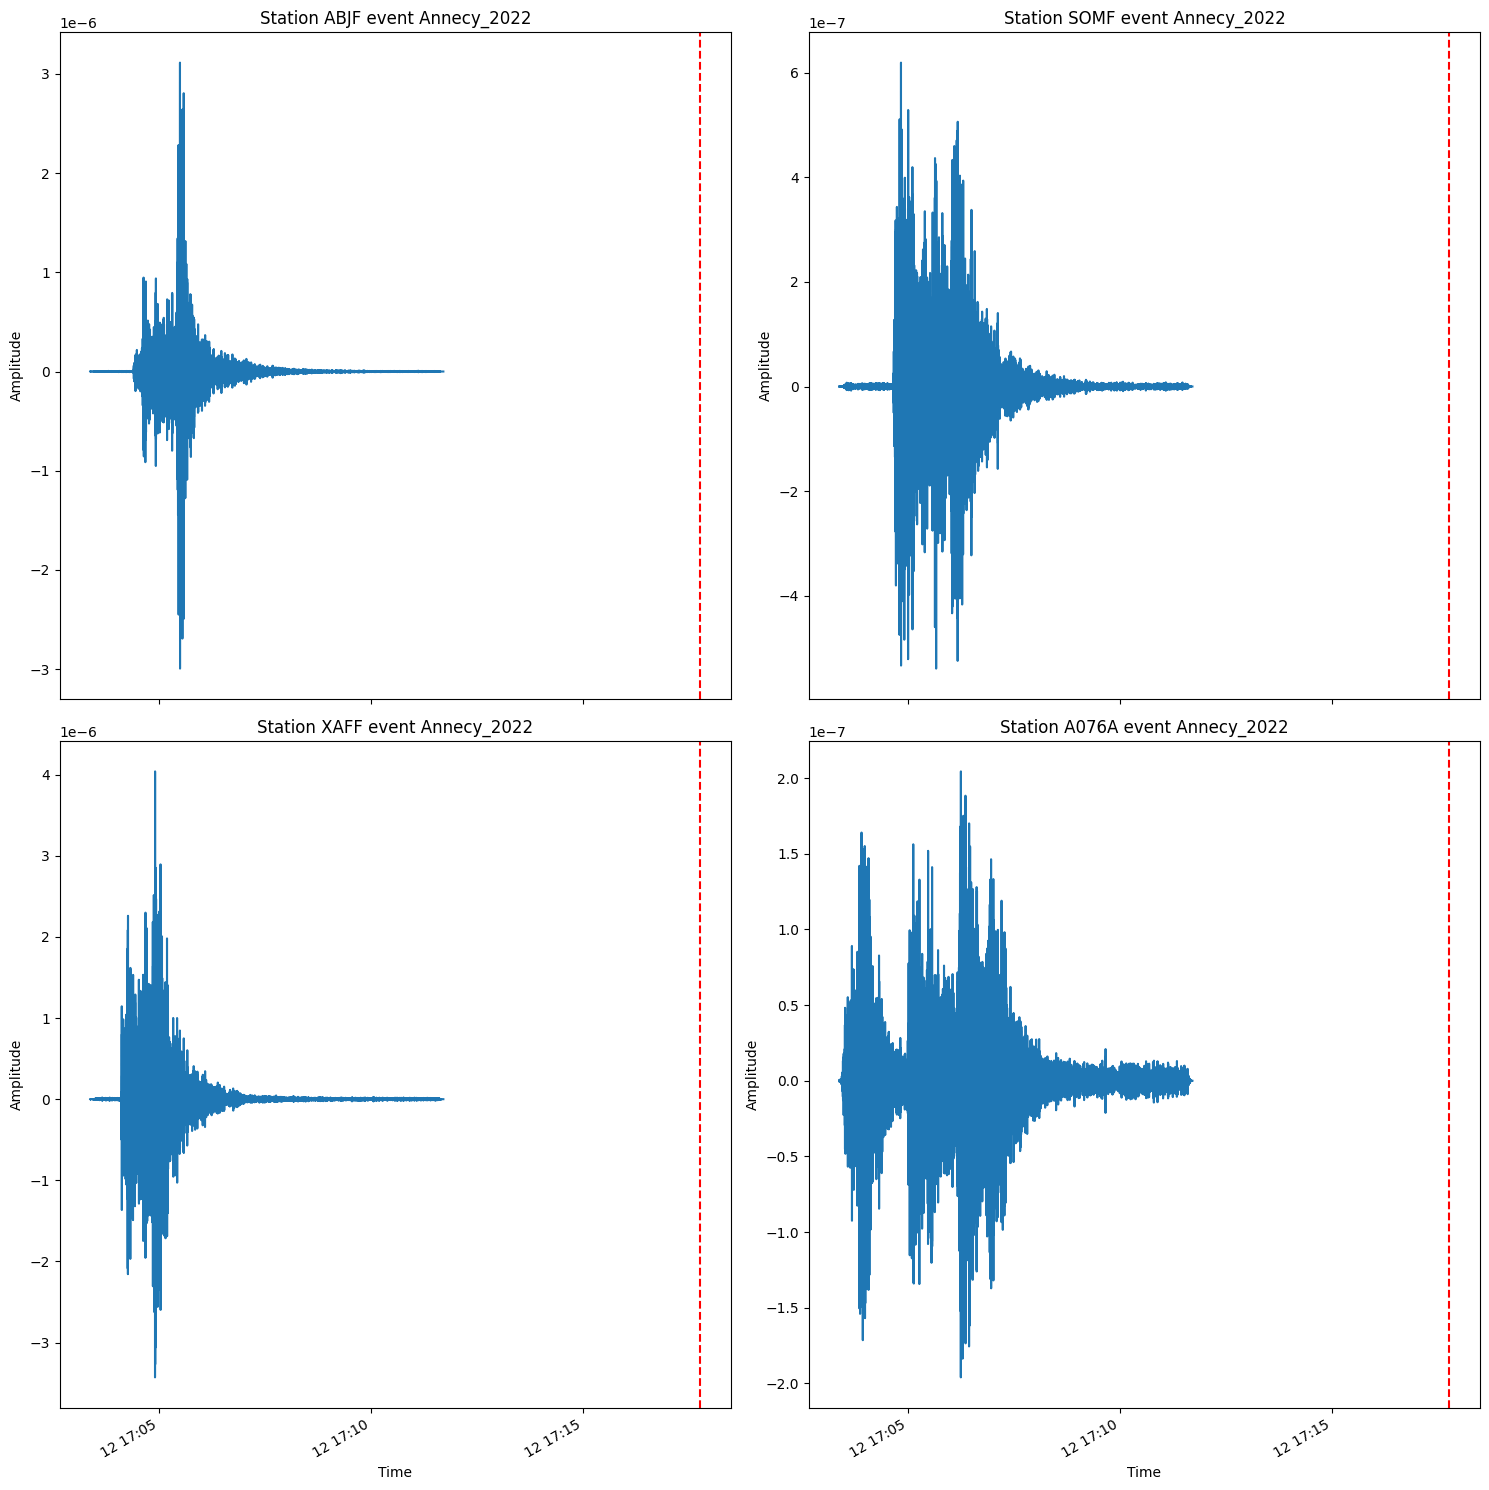

In [12]:

example_traces_idx = [0, 100, 120, 169]
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for i, idx in enumerate(example_traces_idx):
    tr = st_plot_filt_all[idx]
    ax = axs[i // 2, i % 2]

    ax.plot(tr.times("matplotlib"), tr.data)
    coda_start = tr.times("matplotlib")[0] + 0.01
    coda_end = tr.times("matplotlib")[0] + 300
    print((tr.times("matplotlib")[1])-(tr.times("matplotlib")[0]))
    print((tr.times("matplotlib")[2])-(tr.times("matplotlib")[1]))
    print((tr.times("matplotlib")[3])-(tr.times("matplotlib")[2]))

    ax.axvline(coda_start, color='r', linestyle='--', label="start coda window")
    #ax.axvline(coda_end, color='r', linestyle='--', label="end coda window")  
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Station {tr.stats.station} event {event_name}')
    ax.xaxis_date()
    fig.autofmt_xdate()

plt.tight_layout()
plt.show()




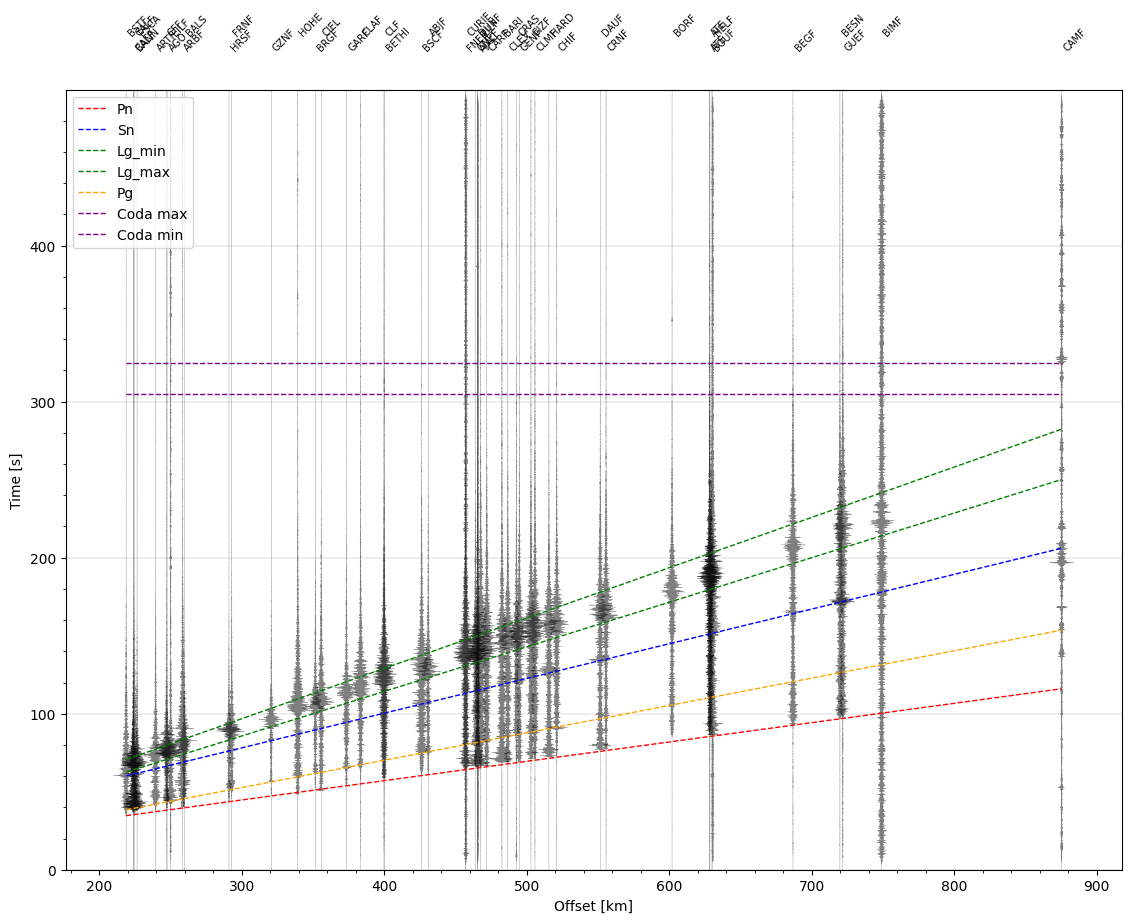

304.8159467493013


In [13]:
plot, st_Lg0 = plot_record_section(st_plot_filt_all[0:50], stations_all[0:50], eq_lat, eq_lon, eq_start, tracehodo=True, v_Lg_min=vLg_min, v_Lg_max=vLg_max, 
v_Pg=vPg,tmincoda=tcoda_test,tmaxcoda=tcoda_test+20)
print(tcoda_test)

### Checking behaviour of body wave phase SNR

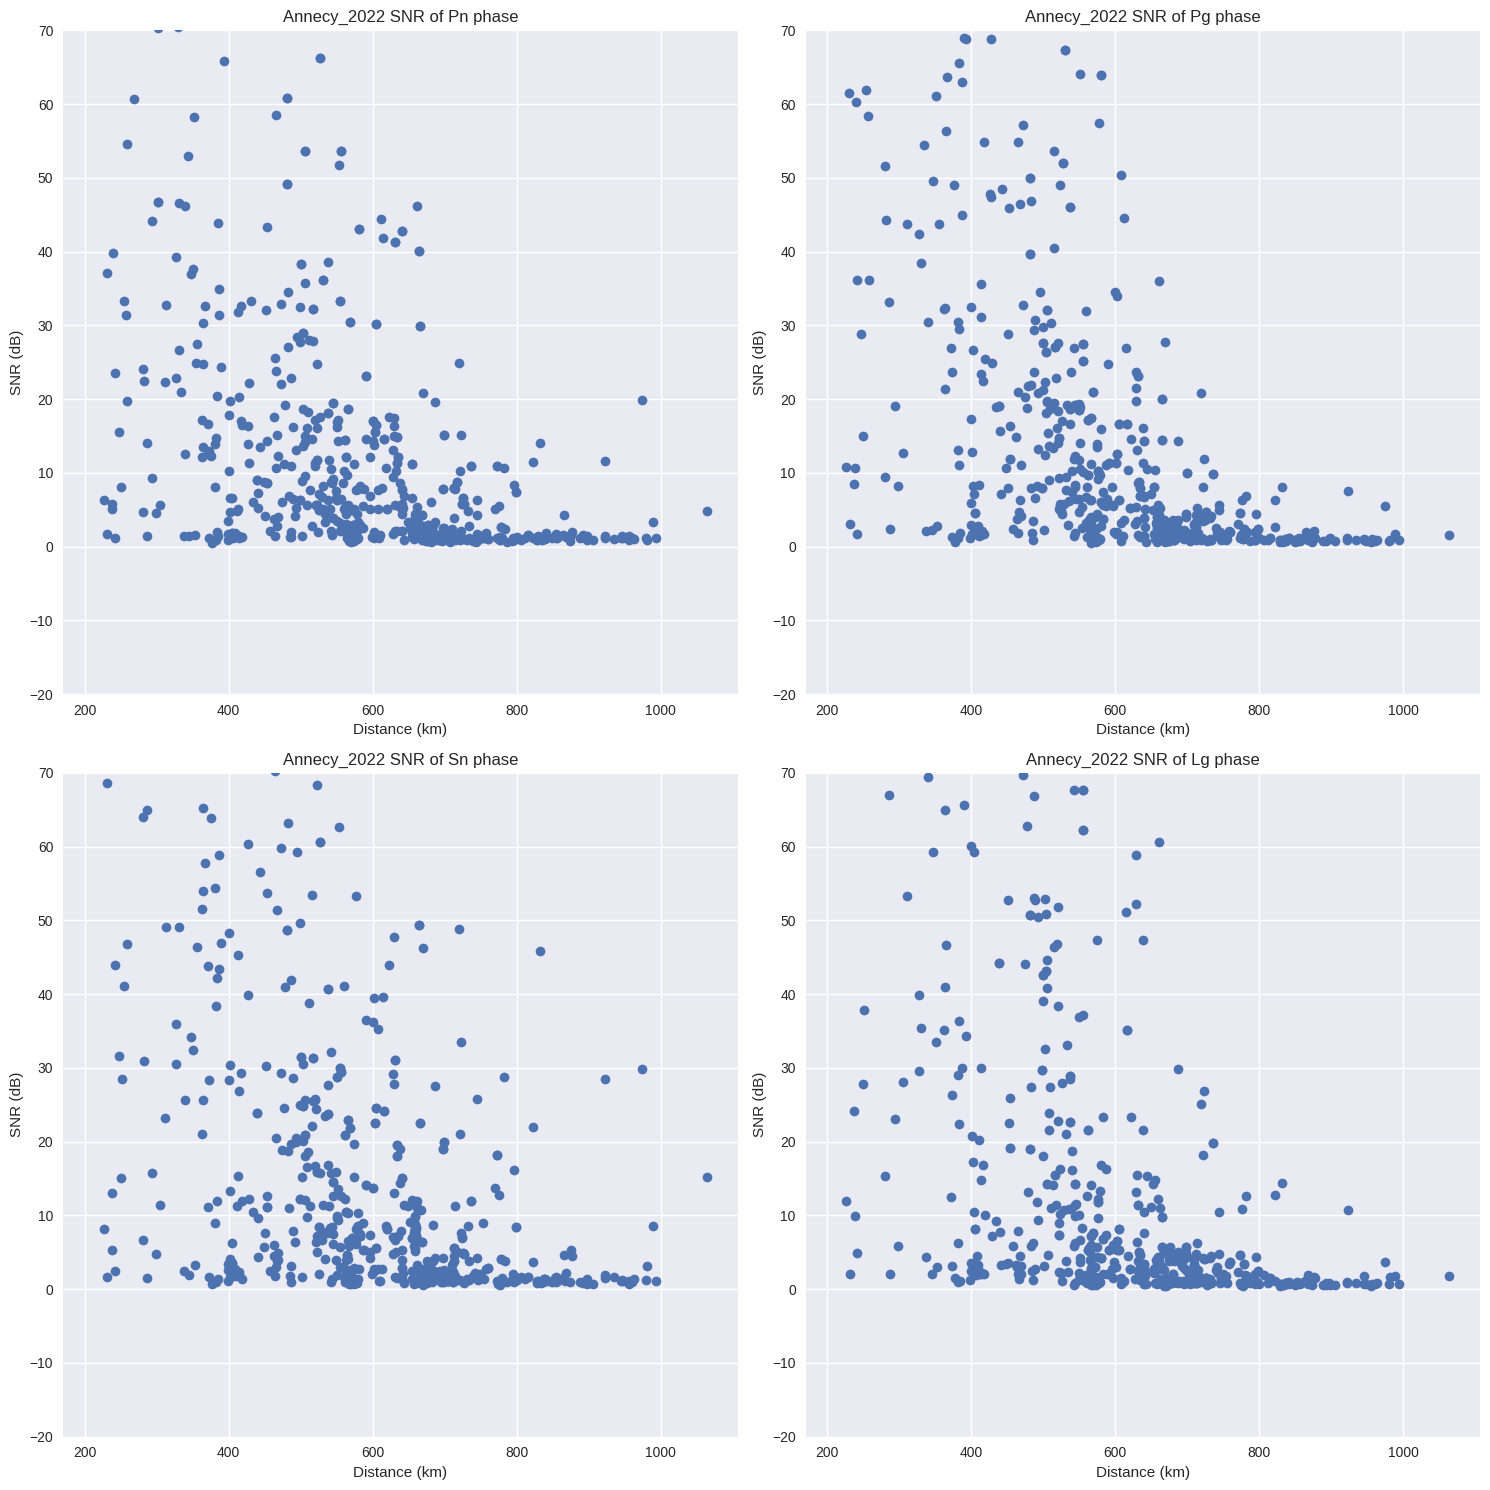

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
plt.style.use('seaborn-v0_8')
phases = ['Pn', 'Pg', 'Sn', 'Lg']
for i in range(10,14):
    SNR_vals = stations_with_snr[:,i].astype(float)
    dist_vals = stations_with_snr[:,5].astype(float)/1000.
    
    ax = axs[(i-10)//2, (i-10)%2]
    ax.plot(dist_vals, SNR_vals, 'o')
    ax.set_ylim([-20, 70])
    ax.set_xlabel('Distance (km)')
    ax.set_ylabel('SNR (dB)')
    ax.set_title(f'{event_name} SNR of {phases[i-10]} phase')
#plt.savefig(f'/home/schreinl/Stage/Figures/SNR/{event_name}_SNR_phases_long.png', format='png')
plt.tight_layout()
plt.show()


#### Segment SNR/Distance in two regimes
There can be two regimes introduced, one where there is direct energy of the incoming wave, and one where there is no more energy, thus low SNR values. Finding the cutoff distance for the different bodywave, which corresponds to this change in regimes, is integral in defining the time window for the coda waves, as for this we need a time window without onset of energy from direct phases, and with energy of only scattered waves.

calculating SNR for Lg  phase


/tmp/ipykernel_3831/3147369857.py:880: RuntimeWarning: invalid value encountered in scalar divide
  snr = signal_power / noise_power
/tmp/ipykernel_3831/3147369857.py:873: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg)
/tmp/ipykernel_3831/3147369857.py:874: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_3831/3147369857.py:880: RuntimeWarning: divide by zero encountered in scalar divide
  snr = signal_power / noise_power


Distance where 90% of SNR values are above 2: 725.9252013970898
calculating SNR for Pn  phase


/tmp/ipykernel_3831/3147369857.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(dist_vals[dist_vals > percentile_distance], poly1d_fn1(dist_vals[dist_vals > percentile_distance]), 'r', color='r', label='insufficient SNR')
/tmp/ipykernel_3831/3147369857.py:994: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(dist_vals[dist_vals < percentile_distance], poly1d_fn(dist_vals[dist_vals < percentile_distance]), 'r', color='g',label='sufficient SNR')
/tmp/ipykernel_3831/3147369857.py:896: RuntimeWarning: invalid value encountered in scalar divide
  snr = signal_power / noise_power
/tmp/ipykernel_3831/3147369857.py:889: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPn,np.t

Distance where 90% of SNR values are above 2: 775.4513159243444
calculating SNR for Sn  phase


/tmp/ipykernel_3831/3147369857.py:912: RuntimeWarning: invalid value encountered in scalar divide
  snr = signal_power / noise_power
/tmp/ipykernel_3831/3147369857.py:905: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn)
/tmp/ipykernel_3831/3147369857.py:906: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_3831/3147369857.py:912: RuntimeWarning: divide by zero encountered in scalar divide
  snr = signal_power / noise_power


Distance where 90% of SNR values are above 2: 777.3464298385461
calculating SNR for Pg  phase


/tmp/ipykernel_3831/3147369857.py:928: RuntimeWarning: invalid value encountered in scalar divide
  snr = signal_power / noise_power
/tmp/ipykernel_3831/3147369857.py:921: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg)
/tmp/ipykernel_3831/3147369857.py:922: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_3831/3147369857.py:928: RuntimeWarning: divide by zero encountered in scalar divide
  snr = signal_power / noise_power


Distance where 90% of SNR values are above 2: 748.4341438171216


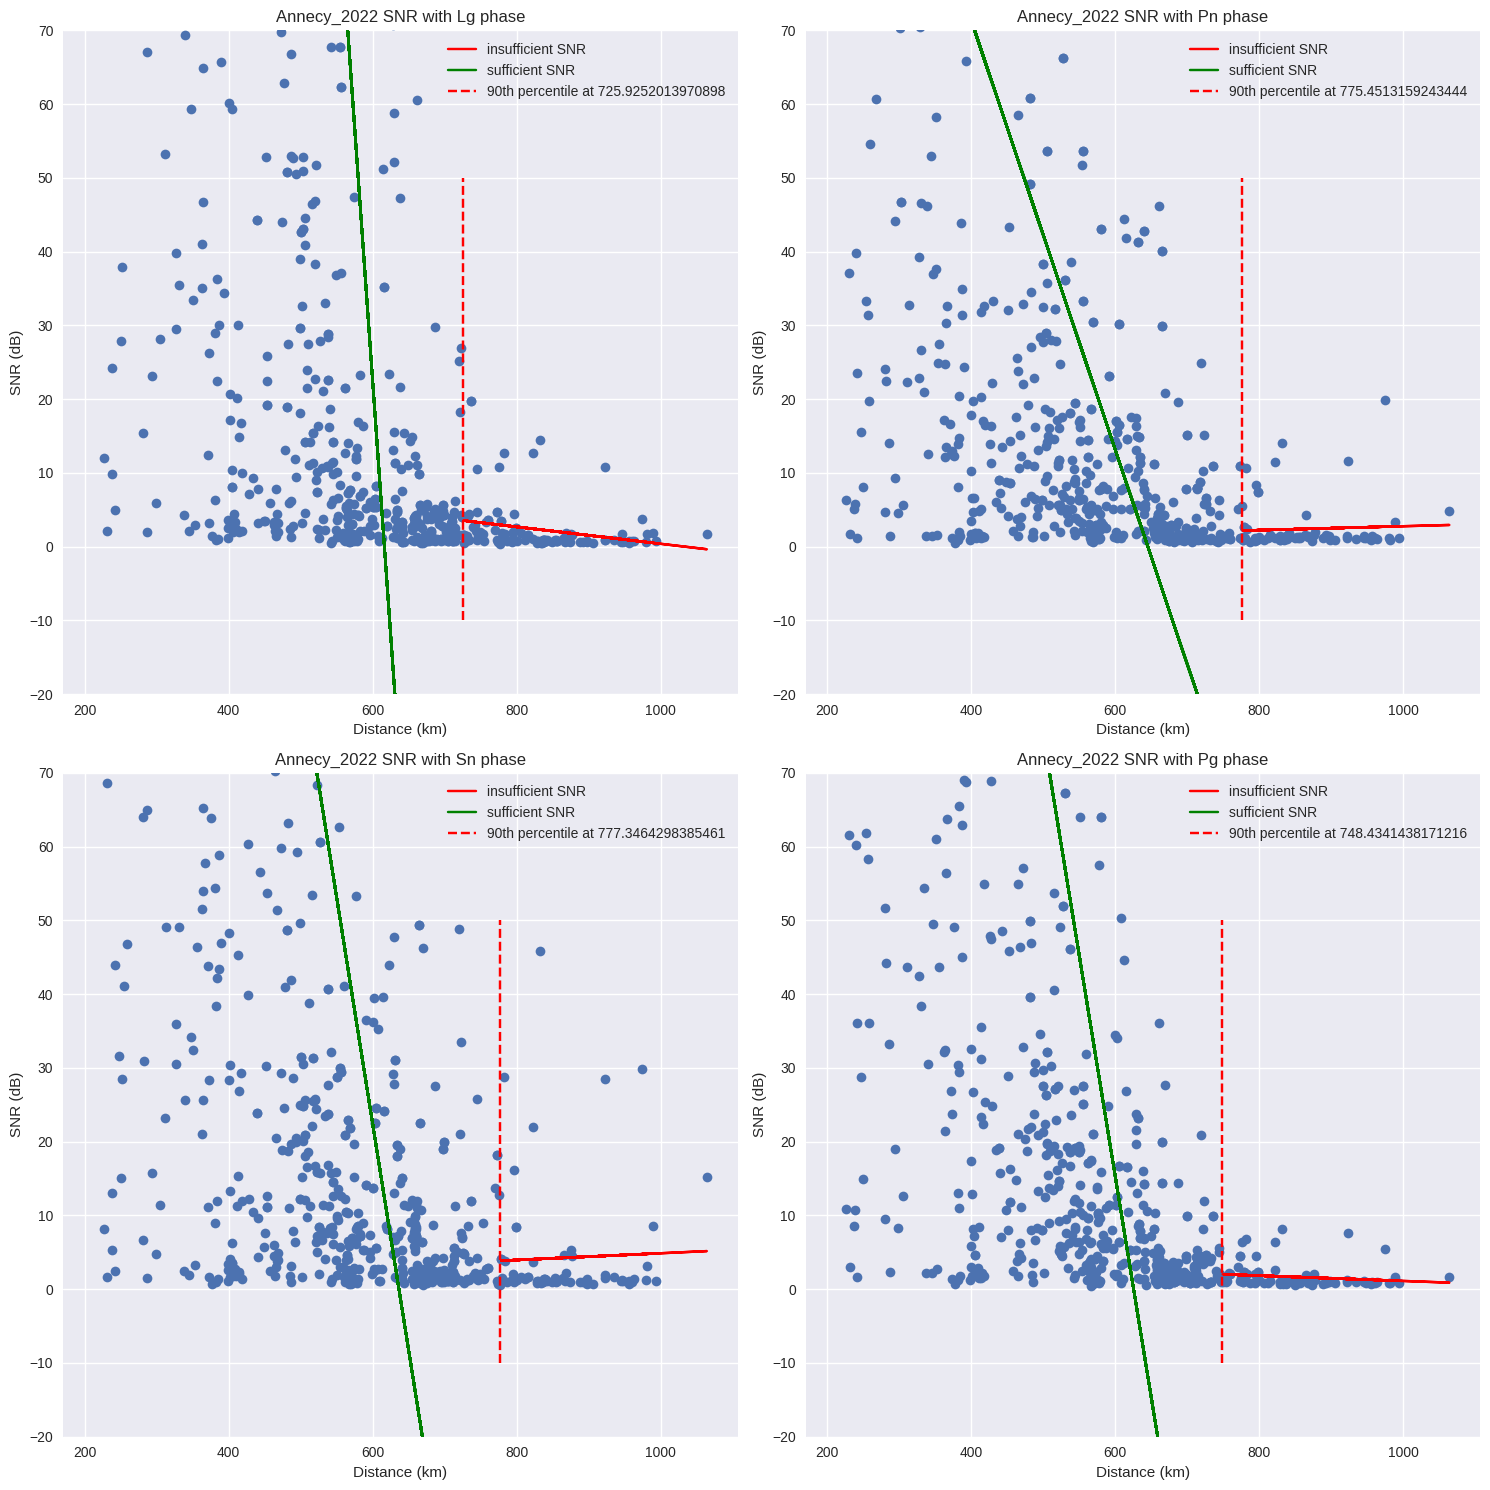

In [31]:
SNR_distance_threshold = SNR_distance(stations_all, st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda,
                 Dtmin_Noise, Dtmax_Noise, eq_start, dB=False)

In [17]:
for key, values in distance_dict.items():
    if isinstance(values, dict) and 'percentile_distance' in values:
        print(f"Cutoff distance at phase {key}: {values['percentile_distance']}")



Cutoff distance at phase Pn: 697.8030223514552
Cutoff distance at phase Pg: 699.4164330786493
Cutoff distance at phase Sn: 713.0447912958274
Cutoff distance at phase Lg: 697.9251804557167


#### Streamline the process to have more datapoints of earthquakes

In [ ]:
import json
import pandas as pd
catalogue = pd.read_csv('/home/schreinl/Stage/Scripts/europe_bigger_than_5.csv') 
directory='/home/schreinl/Stage/Data/'
datacenters =['RESIF','ODC','ETH','INGV','GEOFON','BGR', 'IRIS', 'ICGC']
distmin=1.9
distmax=10.
Dtmin_Noise=-25
Dtmax_Noise=-5
Dtmin_Pn=-5.
Dtmax_Pn=10.
Dtmin_Sn=-5.
Dtmax_Sn=10.
vLg_max=3.5
vLg_min=3.1
vLg=0.5*(vLg_max+vLg_min)
vPg_max=6.2
snr_threshold = 2
vPg_min=5.2
vPg=0.5*(vPg_max+vPg_min)
for i in range(len(catalogue)):
    print(f'Processing earthquake {i+1} out of {len(catalogue)}')

    start = UTCDateTime(catalogue['time'][i])
    eq_start = start
    end = start + 400
    eq_lon = float(catalogue['longitude'][i])
    eq_lat = float(catalogue['latitude'][i])

    # Start downloading routine
    st_all, stations_all, plot = big_downloader2(datacenters, start, end, eq_lon, eq_lat, distmin, distmax, directory, plot=False)
    #filter data
    fmin=3
    fmax=6
    f0=0.5*(fmin+fmax)
    time_string = UTCDateTime.strftime(start, format="%Y_%m_%dT%H_%M_%S")
    st_plot_filt_all=st_all.copy()
    st_plot_filt_all.filter("bandpass", freqmin=fmin, freqmax=fmax)
    #run SNR and station filtering routine
    filtered_stations_with_SNR, stations_with_SNR, distance_dict, tcoda_test, filtered_st, stations_with_amps, amp_plot = SNR_all(stations_all, st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda,
         Dtmin_Noise, Dtmax_Noise,eq_start,eq_lat,eq_lon,snr_threshold=snr_threshold,plot_SNR=False,plot_amps=True, wavecode="Lg_Coda",dB=True)

    with open(f"{directory}/Dicts/{time_string}_{snr_threshold}_thresh_dict.txt", "w") as file:
        json.dump(distance_dict, file, indent=4)
    
    # Create plot of azimuth dependency of SNR
    #10: 'Pn', 11: 'Pg', 12: 'Sn', 13: 'Lg'
    snr_az_sn = snr_azimuth(stations_with_SNR, column=12, barlabel="SNR", xlabel="Azimuth (°)", ylabel="Distance (km)", title="SNR", event_name=time_string, savefig=True, show=False)
    snr_az_pn = snr_azimuth(stations_with_SNR, column=10, barlabel="SNR", xlabel="Azimuth (°)", ylabel="Distance (km)", title="SNR", event_name=time_string, savefig=True, show=False)
    snr_az_pg = snr_azimuth(stations_with_SNR, column=11, barlabel="SNR", xlabel="Azimuth (°)", ylabel="Distance (km)", title="SNR", event_name=time_string, savefig=True, show=False)
    snr_az_lg = snr_azimuth(stations_with_SNR, column=13, barlabel="SNR", xlabel="Azimuth (°)", ylabel="Distance (km)", title="SNR", event_name=time_string, savefig=True, show=False)

    # Save stations_with_amps to a file
    with open(f"{directory}/{time_string}/{time_string}_{snr_threshold}_thresh_stations_with_amps.txt", "w") as ampls:
        json.dump(stations_with_amps.tolist(), ampls, indent=4)
    
    # Save filtered stations with their corresponding SNR
    with open(f"{directory}/{time_string}/{time_string}_{snr_threshold}_thresh_filtered_stations_SNR.txt", "w") as snrfile:
        json.dump(filtered_stations_with_SNR.tolist(), snrfile, indent=4)
    
    # Save the stations with SNR, unfiltered
    with open(f"{directory}/{time_string}/{time_string}_unfiltered_stations_SNR.txt", "w") as unsnrfile:
        json.dump(stations_with_SNR.tolist(), unsnrfile, indent=4)


Processing earthquake 1 out of 31
Earthquake at 2023-09-18T03:10:14.744000Z with magnitude 5.1


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 27.75it/s]


calculating SNR for Pn  phase


/tmp/ipykernel_6372/2855136262.py:674: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn)
/tmp/ipykernel_6372/2855136262.py:675: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


calculating SNR for Pg  phase
calculating SNR for Sn  phase


/tmp/ipykernel_6372/2855136262.py:707: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_6372/2855136262.py:706: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg)
/tmp/ipykernel_6372/2855136262.py:690: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn)
/tmp/ipykernel_6372/2855136262.py:691: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


calculating SNR for Lg  phase
Reduced from   779  stations to   651  stations due to insufficient SNR or distance >  857.6565007836261
coda window set from 371.65115033957136-391.65115033957136s


/tmp/ipykernel_6372/2855136262.py:658: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg)
/tmp/ipykernel_6372/2855136262.py:659: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_6372/2855136262.py:35: RuntimeWarning: divide by zero encountered in divide
  Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,13].astype(float))


plotting Lg_Coda amplitudes
Processing earthquake 2 out of 31
Earthquake at 2022-11-09T06:07:26.657000Z with magnitude 5.6


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 31.36it/s]


calculating SNR for Pn  phase


/tmp/ipykernel_6372/2855136262.py:674: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn)
/tmp/ipykernel_6372/2855136262.py:675: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_6372/2855136262.py:706: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg)
/tmp/ipykernel_6372/2855136262.py:707: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


calculating SNR for Pg  phase
calculating SNR for Sn  phase


/tmp/ipykernel_6372/2855136262.py:690: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn)
/tmp/ipykernel_6372/2855136262.py:691: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_6372/2855136262.py:658: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg)
/tmp/ipykernel_6372/2855136262.py:659: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


calculating SNR for Lg  phase
Reduced from   706  stations to   612  stations due to insufficient SNR or distance >  940.9047056116257
coda window set from 407.7253724317045-427.7253724317045s
plotting Lg_Coda amplitudes
Processing earthquake 3 out of 31
Earthquake at 2021-03-27T13:47:55.267000Z with magnitude 5.5


Processing stations of RESIF:   0%|          | 0/210 [00:00<?, ?it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of ODC:  36%|███▌      | 67/188 [00:00<00:01, 73.09it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of ETH:   0%|          | 0/83 [00:00<?, ?it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of INGV:  

1 Trace(s) in Stream:
HS.GWBC..HHZ | 2021-03-27T13:47:55.270000Z - 2021-03-27T13:54:35.270000Z | 100.0 Hz, 40001 samples False


Processing stations of BGR:  59%|█████▊    | 106/181 [01:06<01:21,  1.08s/it]

1 Trace(s) in Stream:
HS.WBA..HHZ | 2021-03-27T13:47:55.270000Z - 2021-03-27T13:54:35.270000Z | 100.0 Hz, 40001 samples False


Processing stations of BGR:  60%|██████    | 109/181 [01:09<01:21,  1.13s/it]

1 Trace(s) in Stream:
HS.WBFO..HHZ | 2021-03-27T13:47:55.270000Z - 2021-03-27T13:54:35.270000Z | 100.0 Hz, 40001 samples False


Processing stations of IRIS:  17%|█▋        | 31/180 [00:18<01:41,  1.47it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of ICGC:   0%|          | 0/24 [00:00<?, ?it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 26.77it/s]


calculating SNR for Pn  phase


/tmp/ipykernel_6372/2855136262.py:674: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn)
/tmp/ipykernel_6372/2855136262.py:675: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


calculating SNR for Pg  phase
calculating SNR for Sn  phase


/tmp/ipykernel_6372/2855136262.py:706: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg)
/tmp/ipykernel_6372/2855136262.py:707: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_6372/2855136262.py:690: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn)
/tmp/ipykernel_6372/2855136262.py:691: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


calculating SNR for Lg  phase
Reduced from   618  stations to   501  stations due to insufficient SNR or distance >  988.6815847981752
coda window set from 428.4286867458759-448.4286867458759s


/tmp/ipykernel_6372/2855136262.py:658: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg)
/tmp/ipykernel_6372/2855136262.py:659: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_6372/2855136262.py:35: RuntimeWarning: divide by zero encountered in divide
  Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,13].astype(float))


plotting Lg_Coda amplitudes
Processing earthquake 4 out of 31
Earthquake at 2020-12-29T11:23:46.151000Z with magnitude 4.9


Processing stations of RESIF:   0%|          | 0/206 [00:00<?, ?it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of ODC:   0%|          | 0/184 [00:00<?, ?it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of ODC:  43%|████▎     | 80/184 [00:23<01:35,  1.09it/s]

### Defined functions:

In [2]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.clients.fdsn import RoutingClient
from obspy import Stream
from obspy.geodetics import gps2dist_azimuth
from obspy import signal

import matplotlib.pyplot as plt
import folium
import numpy as np

def select_ratio(wavecode, stations_with_amps):
    '''
    this only works when the stations_with amps file is in this format:
    net (0), sta (1), lat (2), lon (3), elev (4) , dist(5), az(6), 
    t_Pn (7), t_Sn (8), t_Pg(9), A_Pn (10), A_Sn (11), A_Lg(12), A_Coda(13), A_Noise(14), A_pg(15)

    '''
    distDraw=stations_with_amps[:,5].astype(float)/1000.
    azDraw=stations_with_amps[:,6].astype(float) 

    if wavecode == 'Pn' :
        Amp_Draw=stations_with_amps[:,10].astype(float)
    elif wavecode == 'Sn' :
        Amp_Draw=stations_with_amps[:,11].astype(float)
    elif wavecode == 'Lg' :
        Amp_Draw=stations_with_amps[:,12].astype(float)  
    elif wavecode == 'Coda' :
        Amp_Draw=stations_with_amps[:,13].astype(float)    
    elif wavecode == 'Noise' :
        Amp_Draw=stations_with_amps[:,14].astype(float) 
    elif wavecode == 'Pg' :
        Amp_Draw=stations_with_amps[:,15].astype(float)
    elif wavecode == 'Lg_Coda' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,13].astype(float))
    elif wavecode == 'Lg_Pn' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,10].astype(float))
    elif wavecode == 'Lg_Pg' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,15].astype(float))
    elif wavecode == 'Lg_Sn' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,11].astype(float))
    elif wavecode == 'Pn_Coda' :
        Amp_Draw=np.divide(stations_with_amps[:,10].astype(float),stations_with_amps[:,13].astype(float))
    elif wavecode == 'Sn_Coda' :
        Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,13].astype(float))
    elif wavecode == 'Lg_Noise' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,14].astype(float))
    elif wavecode == 'Coda_Noise' :
        Amp_Draw=np.divide(stations_with_amps[:,13].astype(float),stations_with_amps[:,14].astype(float))
    else:
        Amp_Draw = np.zeros(stations_with_amps.shape[0])
        print('wavecode not recognized')
    Amp_Draw[np.isnan(Amp_Draw)] = 0    
    Amp_Draw[np.isinf(Amp_Draw)] = 0
    return Amp_Draw


def get_Pn_time(dist_deg) :


    from obspy.taup import TauPyModel

    model = TauPyModel(model='ak135') #crust at 35 (?) , but only 3s difference with 11km crust 
    t_Pn=111.*dist_deg/8.  #default value
    
    arrivals = model.get_travel_times(source_depth_in_km=0,
                                  distance_in_degree=dist_deg,phase_list=["Pn"])


    try:
        t_Pn=arrivals [0].time
    except Exception as e:
        print('no Pn ', dist_deg, e)
        

    return t_Pn


def get_Sn_time(dist_deg) :

    from obspy.taup import TauPyModel

    model = TauPyModel(model='ak135') #crust at 35 (?) , but only 3s difference with 11km crust 
    t_Sn=111.*dist_deg/8.  #default value
    
    arrivals = model.get_travel_times(source_depth_in_km=0,
                                  distance_in_degree=dist_deg,phase_list=["Sn"])


    try:
        t_Sn=arrivals [0].time
    except Exception as e:
        print('no Sn ', dist_deg, e)

    return t_Sn

def get_Pg_time(dist_deg) :

    from obspy.taup import TauPyModel

    model = TauPyModel(model='ak135') 
    t_Pg=111.*dist_deg/6.
    
    arrivals = model.get_travel_times(source_depth_in_km=0,
                                  distance_in_degree=dist_deg,phase_list=["Pg"])


    try:
        t_Pg=arrivals [0].time
    except Exception as e:
        t_Pg = dist_deg/5.7
        #print('no Pg ', dist_deg, e)

    return t_Pg

import os
from obspy import read, UTCDateTime
from time import sleep
import sys
from tqdm.auto import tqdm

def get_data2(client, inventory, start, end, eq_lon, eq_lat, distmin, distmax, directory='/home/schreinl/Stage/Data/',datacenter='datacenter'):
    """
    -function that downloads data from given client and inventory for a given time window
    -filters the stations based on their location
    -checks if data is already downloaded and reads it from disk if it is
    -gives back stream with all the data {st_final_target}, as well as a list of stations and their metadata,
      including expected arrival times of Pn and Sn {stations_target}
    """
    #initialize variables
    stations_target = []
    time_string = UTCDateTime.strftime(start, format="%Y_%m_%dT%H_%M_%S")

    priorities = ["BHZ", "HHZ", "SHZ"]
    stat_count = 0
    st_final_target = None
    
    #create target directory
    target_directory = f'{directory}{time_string}' #format /../
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)
    logfile_path = os.path.join(target_directory, f"{time_string}.txt")
    
    #Read existing log file if it exists
    log_data = {}
    if os.path.exists(logfile_path):
        with open(logfile_path, "r") as logfile:
            for line in logfile:
                station_channel, status = line.strip().split(',')
                log_data[station_channel] = status

    #open log file for appending in a+ mode
    logfile = open(logfile_path, "a+")

    # Initialize tqdm progress bar
    total_stations = sum(len(network.stations) for network in inventory)
    pbar = tqdm(total=total_stations, desc=f"Processing stations of {datacenter}")

    for network in inventory:
        for station in network.stations:
            # Update progress bar
            pbar.update(1)
            
            #calculate distance between station and earthquake
            epi_dist, az, baz = gps2dist_azimuth(eq_lat, eq_lon, station.latitude, station.longitude)
            epi_dist_deg = epi_dist / 1000 / 111. 
            
            #check if station is in the desired distance range
            if distmin < epi_dist_deg < distmax:
                prio = [0, 0, 0]
                for location in station:
                    if location.code == priorities[0]: prio[0] = 1
                    if location.code == priorities[1]: prio[1] = 1
                    if location.code == priorities[2]: prio[2] = 1
                
                #create filepath for each channel
                chan_to_get = priorities[prio.index(1)]
                station_channel = f"{network.code}_{station.code}_{chan_to_get}"
                filename = f'{station_channel}_{time_string}.mseed'
                file_path = os.path.join(target_directory, filename)
                
                # Check log data for existing status
                if station_channel in log_data:
                    status = log_data[station_channel]
                    if status == "downloaded":
                        st = read(file_path)
                        conv_step = True
                    elif status == "unknown":
                        #print(f"Retrying download for {station_channel}")
                        try:
                            st = client.get_waveforms(
                                network.code,
                                station.code,
                                "*",
                                chan_to_get,
                                starttime=start,
                                endtime=end,
                                attach_response=False
                            )
                            #deconcolve with instrument response and store
                            st_prec, conv_step = preproc_single(st, inventory)
                            st_prec.write(file_path, format="MSEED")
                            st = st_prec
                            logfile.write(f"{station_channel},downloaded\n")
                        except Exception as e:
                            logfile.write(f"{station_channel},unknown\n")
                            continue
                    else:
                        continue
                else:
                    #if it does not exist, download it from the client
                    try:
                        st = client.get_waveforms(
                            network.code,
                            station.code,
                            "*",
                            chan_to_get,
                            starttime=start,
                            endtime=end,
                            attach_response=False
                        )
                        #deconcolve with instrument response and store
                        st_prec, conv_step = preproc_single(st, inventory)
                        st_prec.write(file_path, format="MSEED")
                        st = st_prec
                        logfile.write(f"{station_channel},downloaded\n")
                    except Exception as e:
                        if "204" or "404" in str(e):
                            logfile.write(f"{station_channel},204/404\n")
                        elif "403" in str(e):
                            logfile.write(f"{station_channel},403\n")
                        elif "URLError" in str(e):
                            logfile.write(f"{station_channel},URLError\n")
                        else:
                            logfile.write(f"{station_channel},unknown\n")
                        continue
                
                #if data is available, calculate expected arrival times of Pn and Sn, and store 
                if conv_step:
                    t_Pn = get_Pn_time(epi_dist_deg)
                    t_Sn = get_Sn_time(epi_dist_deg)
                    t_Pg = get_Pg_time(epi_dist_deg)
                    stations_target.append([network.code, station.code, station.latitude, station.longitude, 
                                            station.elevation, epi_dist, az, t_Pn, t_Sn,t_Pg])
                    stat_count += 1

                    #handle cases where st_final_target is None
                    if st_final_target is None:
                        st_final_target = st.copy()
                    else:
                        st_final_target += st
    #if no data is available at all, return None Stream
    if st_final_target is None:
        from obspy import Stream
        st_final_target = Stream()

    logfile.close()
    pbar.close()
    return st_final_target, stations_target







def big_downloader2(datacenters, start, end, eq_lon, eq_lat, distmin, distmax, directory='/home/schreinl/Stage/Data/',plot=False):
    """
    -input: list of datacenters type str, start and end time of the time window, minimum and maximum distance in degrees
    -function that downloads data from multiple datacenters
    -filters the stations based on their location
    -checks if data is already downloaded and reads it from disk if it is
    -possibility to plot the filtered stations
    -gives back stream with all the data {st_final_target}, as well as a list of stations and their metadata,
      including expected arrival times of Pn and Sn {stations_target}
    """



    
    #hardcoded for now the box values of stations
    minlat_st=40.
    maxlat_st=52
    minlon_st=-5            
    maxlon_st=16




    #write the earthquake info in a file
    events_list = Client("USGS").get_events(
    minlatitude=37,
    maxlatitude=50,
    minlongitude=-5,
    maxlongitude=17,
    minmagnitude=3,
    starttime=start,
    endtime=end)

    eqo = events_list[0].origins[0]
    eq_start = eqo.time
    eq_mag = events_list[0].magnitudes[0].mag
    t_duration=500.
    eq_end = eq_start + t_duration
    eq_lat=eqo.latitude
    eq_lon=eqo.longitude
  

    # Define output file
    time_string = UTCDateTime.strftime(start, format="%Y_%m_%dT%H_%M_%S")
    output_file = f"/home/schreinl/Stage/Data/Metadata/{time_string}.txt"

    with open(output_file, "w") as f:
        f.write(f"Start Time: {eq_start}\n")
        f.write(f"End Time: {eq_end}\n")
        f.write(f"Latitude: {eq_lat}\n")
        f.write(f"Longitude: {eq_lon}\n")
        f.write(f"Magnitude: {eq_mag}\n")

    print(f"Earthquake at {eq_start} with magnitude {eq_mag}")





    st_final_target = None
    logfile_combined = []
    st_final_stations = []
    #create inventory for each datacenter
    for i in range(len(datacenters)):
        client = Client(datacenters[i])
        logfile_center = []
        inventory=client.get_stations(
                        network="*",station="*",channel="HHZ,BHZ,SHZ",
                        location="*",starttime=start,endtime= end,
                        minlatitude=minlat_st,maxlatitude=maxlat_st,
                        minlongitude=minlon_st,maxlongitude=maxlon_st,
                        level="response")
        #get data for each datacenter
        st_final_center, stations_center = get_data2(client, inventory, start, end,eq_lon, eq_lat, distmin, distmax, directory='/home/schreinl/Stage/Data/', datacenter=f'{datacenters[i]}')
        if st_final_target is None:
            st_final_target = st_final_center
        else:
            st_final_target += st_final_center
        st_final_stations += stations_center
    #plotting option
    if plot:
        filtered_stations = folium.Map(location=[eq_lat,eq_lon],zoom_start=5)
            
        for station in st_final_stations:
            folium.RegularPolygonMarker(
                location=[station[2], station[3]],
                tooltip=f"{station[0]}.{station[1]}",
                color="red",
                fill=True,
                number_of_sides=3,
                radius=3,
                rotation=30,
            ).add_to(filtered_stations)
        return st_final_target, st_final_stations, filtered_stations


    return st_final_target, st_final_stations, None



#degmin=1.9
#degmax=7.
#clients = ['RESIF', 'ETH', 'INGV', 'ODC']
#test_st, test_stations, filtered_stations = big_downloader2(clients, start, end, degmin, degmax, plot=True)
#filtered_stations



def preproc_single(st,inv) :
    st_work=st.copy()
    st_work=st_work.detrend("linear")
    st_work.taper(max_percentage=0.02)
    conv_step=True
    try :
        st_work.remove_response(output="VEL", water_level=10, inventory=inv)   
    except Exception as e:
        conv_step=False
        print(st,conv_step)
    return st_work, conv_step



def plot_record_section(
    st, stations, eq_lat, eq_lon, eq_start, size=(1200, 1000), show=True, outfile=None, tracehodo=True, v_Lg_min=3.1, v_Lg_max=3.5, 
v_Pg=6.,tmincoda=300,tmaxcoda=320):

    if not st or not stations:
        print("Station or stream empty.")
        return
    st2 = Stream()
    
 # create stream corresponding to the stations in matrix stations. 
    station_array=np.array(stations)

    dist_work=station_array[:,5].astype(float)/1000.
    t_Pn_work=station_array[:,7].astype(float)
    t_Sn_work=station_array[:,8].astype(float)
    t_Pg_work=station_array[:,9].astype(float)
    dist_index=np.argsort(dist_work)
    dist_sectplot=dist_work[dist_index]
    t_Pn_plot=t_Pn_work[dist_index]
    t_Sn_plot=t_Sn_work[dist_index]
    t_Lg_min_plot=dist_sectplot/v_Lg_max
    t_Lg_max_plot=dist_sectplot/v_Lg_min
    t_Pg_plot=dist_sectplot/v_Pg
    tmin_coda = [tmincoda] * len(t_Pg_plot)
    tmax_coda = [tmaxcoda] *len(t_Pg_plot)
    #t_Pg_plot_tauP = t_Pg_work[dist_index]

    for tr in st:
        for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn, t_Pg in stations:
            # We keep traces with a corresponding station only:
            if tr.stats.network == net and tr.stats.station == sta:
                tr.stats.coordinates = {"latitude": lat, "longitude": lon}
                tr.stats.distance = dist
                st2.append(tr)  

    # Plot the section:
    figure = plt.figure(figsize=(size[0] // 100, size[1] // 100))
    if len(st2) < 2:
        print("Cannot build plot section with less than two traces.\n")
        return

    begin = min(tr.stats.starttime for tr in st2)
    st2.trim(starttime=begin, pad=True, fill_value=0)

    st2.plot(type="section", linewidth=0.25, grid_linewidth=0.25, fig=figure, norm_method='trace')
    ax = figure.axes[0]

    ds = [(tr.stats.distance, tr.stats.station) for tr in st2]
    ds.sort()
    for n, (dist, sta) in enumerate(ds):
        # to avoid merged titles
        ycoord = 1.05 if (n + 1) % 2 == 0 else 1.07
        ax.text(dist / 1e3, ycoord * ax.get_ylim()[1], sta, fontsize=7, rotation=45)
    if tracehodo == True :
        plt.plot(dist_sectplot, t_Pn_plot, color='r', linestyle='dashed',linewidth=1,label='Pn')
        plt.plot(dist_sectplot, t_Sn_plot, color='b', linestyle='dashed',linewidth=1,label='Sn')
        plt.plot(dist_sectplot, t_Lg_min_plot, color='g', linestyle='dashed',linewidth=1,label='Lg_min')
        plt.plot(dist_sectplot, t_Lg_max_plot, color='g', linestyle='dashed',linewidth=1,label='Lg_max')
        plt.plot(dist_sectplot, t_Pg_plot, color='orange', linestyle='dashed',linewidth=1,label='Pg')
        plt.plot(dist_sectplot, tmax_coda, color='purple', linestyle='dashed',linewidth=1,label='Coda max')
        plt.plot(dist_sectplot, tmin_coda, color='purple', linestyle='dashed',linewidth=1,label='Coda min')


        #plt.plot(dist_sectplot, t_Pg_plot_tauP, color='k', linestyle='dashed',linewidth=1,label='Pg_tauP')
        plt.legend(loc='upper left')
        st_Lg = Stream()
        for tr in st2:
            dist = tr.stats.distance / 1000.0
            t_Lg_min = dist / v_Lg_max
            t_Lg_max = dist / v_Lg_min
            tr_Lg = tr.copy().trim(starttime=eq_start + t_Lg_min, endtime=eq_start + t_Lg_max)
            st_Lg.append(tr_Lg)
        
            
    
    if outfile:
        plt.savefig(outfile)
    elif show:

        plt.show()
    return figure, st_Lg



def SNR(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tmin_Coda, tmax_Coda,
         Dtmin_Noise, Dtmax_Noise,eq_start, method='time_amplitude',signal_window='coda',plot_map=False,dB=False):

    
    print(f'calculating SNR for {signal_window}  phase')
    SNR = []
    if method == 'time_amplitude':
        for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn ,t_Pg in stations:
            A_Noise=0.
            A_Pn=0.
            A_Sn=0.
            A_Lg=0.
            A_Coda=0.
            A_LgAP=0.
            A_LgACoda=0.
            tmin_Noise=t_Pn+Dtmin_Noise
            tmax_Noise=t_Pn+Dtmax_Noise
            tmin_Pn=t_Pn+Dtmin_Pn
            tmax_Pn=t_Pn+Dtmax_Pn
            tmin_Sn=t_Sn+Dtmin_Sn
            tmax_Sn=t_Sn+Dtmax_Sn
            

            for tr in st :
                if tr.stats.network == net and tr.stats.station == sta:
                    tminLg=dist/1000/vLg_max
                    tmaxLg=dist/1000/vLg_min
                    tmin_Pg=dist/1000/vPg_max
                    tmax_Pg=dist/1000/vPg_min
                    trace_start=tr.stats.starttime - eq_start
                    dt=tr.stats.delta
                    nt=tr.stats.npts
                    trace_end=trace_start+dt*(nt-1)
                    tvector=np.arange(trace_start,trace_end+dt,dt)
                    datavector=tr.data
                
                    if signal_window == 'coda':
                        iminCoda=int((tmin_Coda-trace_start)/dt)
                        imaxCoda=int((tmax_Coda-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectCoda=(datavector[iminCoda:imaxCoda])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectCoda)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power/noise_power

                    if signal_window == 'Lg':
                        iminLg=int((tminLg-trace_start)/dt)
                        imaxLg=int((tmaxLg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectLg=(datavector[iminLg:imaxLg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectLg)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if signal_window == 'Pn':
                        iminPn=int((tmin_Pn-trace_start)/dt)
                        imaxPn=int((tmax_Pn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPn=(datavector[iminPn:imaxPn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectPn)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                    
                    if signal_window == 'Sn':
                        iminSn=int((tmin_Sn-trace_start)/dt)
                        imaxSn=int((tmax_Sn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectSn=(datavector[iminSn:imaxSn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sum(np.abs(dataselectSn)**2)
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if signal_window == 'Pg':
                        iminPg=int((tmin_Pg-trace_start)/dt)
                        imaxPg=int((tmax_Pg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPg=(datavector[iminPg:imaxPg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sum(np.abs(dataselectPg)**2)
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                        
            SNR.append([snr])
        stations_with_SNR=np.append(np.array(stations),np.array(SNR),axis=1)
        
        if plot_map==True:
            Amp_Draw=stations_with_SNR[:,9].astype(float)
            Amp_Draw[np.isnan(Amp_Draw)] = 0    
            Amp_Draw[np.isinf(Amp_Draw)] = 0
            plotit =plot_stations_amps(stations_with_SNR, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
            plotit


        return stations_with_SNR






def SNR_all(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tmin_Coda, tmax_Coda,
         Dtmin_Noise, Dtmax_Noise,eq_start,eq_lat,eq_lon,snr_threshold=2,plot_SNR=False,plot_amps=False,wavecode="Lg_Pg",dB=False):
    """
stations: list with stations as processed with bid_downloader
st: data stream
other variables are float
"""
    signal_windows = ['Pn', 'Pg', 'Sn', 'Lg']
    #initialize table, which has dims (MxN), M amount of stations N amount of phases for which the SNR is computed
    snrs = np.zeros((len(stations),len(signal_windows)))
    for j, window in enumerate(signal_windows):
        print(f'calculating SNR for {window}  phase')
    #calculating the SNR for a specific phase
        for k, station in enumerate(stations):
            net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg = station
            A_Noise=0.
            A_Pn=0.
            A_Sn=0.
            A_Lg=0.
            A_Coda=0.
            A_LgAP=0.
            A_LgACoda=0.
            tmin_Noise=t_Pn+Dtmin_Noise
            tmax_Noise=t_Pn+Dtmax_Noise
            tmin_Pn=t_Pn+Dtmin_Pn
            tmax_Pn=t_Pn+Dtmax_Pn
            tmin_Sn=t_Sn+Dtmin_Sn
            tmax_Sn=t_Sn+Dtmax_Sn
            

            for tr in st :
                if tr.stats.network == net and tr.stats.station == sta:
                    tminLg=dist/1000/vLg_max
                    tmaxLg=dist/1000/vLg_min
                    tmin_Pg=dist/1000/vPg_max
                    tmax_Pg=dist/1000/vPg_min
                    trace_start=tr.stats.starttime - eq_start
                    dt=tr.stats.delta
                    nt=tr.stats.npts
                    trace_end=trace_start+dt*(nt-1)
                    tvector=np.arange(trace_start,trace_end+dt,dt)
                    datavector=tr.data
                

                    if window == 'Lg':
                        iminLg=int((tminLg-trace_start)/dt)
                        imaxLg=int((tmaxLg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectLg=(datavector[iminLg:imaxLg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if window == 'Pn':
                        iminPn=int((tmin_Pn-trace_start)/dt)
                        imaxPn=int((tmax_Pn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPn=(datavector[iminPn:imaxPn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                    
                    if window == 'Sn':
                        iminSn=int((tmin_Sn-trace_start)/dt)
                        imaxSn=int((tmax_Sn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectSn=(datavector[iminSn:imaxSn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if window == 'Pg':
                        iminPg=int((tmin_Pg-trace_start)/dt)
                        imaxPg=int((tmax_Pg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPg=(datavector[iminPg:imaxPg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
            #write value of snr with phase at index j and station at index k in the initialized table            
            snrs[k,j] = snr
    #now station with SNR has all the information of the stations (net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg), as well 
    #as the SNR ratios of the given phases (signal_windows) as subsequent columns 'Pn', 'Pg', 'Sn', 'Lg'
    stations_with_SNR=np.append(np.array(stations),np.array(snrs),axis=1)



    
    #plotting possibility, here all phases are plotted
    if plot_SNR==True:
        for l, window in enumerate(signal_windows):
            Amp_Draw[np.isnan(Amp_Draw)] = 0    
            Amp_Draw[np.isinf(Amp_Draw)] = 0
            plotit =plot_stations_amps(stations_with_SNR, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
            plotit

    #now find the cutoff distances for all the phases
    phase_distance = {}
    for w, window in enumerate(signal_windows):
        SNR_vals = stations_with_SNR[:, 10+w].astype(float)
        dist_vals = stations_with_SNR[:, 5].astype(float) / 1000. 
        #SNR_vals = SNR_vals[np.isfinite(SNR_vals)]
        #dist_vals = dist_vals[np.isfinite(SNR_vals)]
        snr_threshold = snr_threshold
        filtered_distances = dist_vals[SNR_vals > snr_threshold]

        if len(filtered_distances) > 0:
            percentile_distance = np.percentile(filtered_distances, 90)
            phase_distance[window] = percentile_distance
            #print(f"Distance where 90% of SNR values are above 2: {percentile_distance}")
        else:
            print("No valid SNR values above 2.")
        #calculate the slope for for the regression snr = a*dist + b, when dist < percentile_distance, so sufficient SNR
        coef = np.polyfit(dist_vals[dist_vals < percentile_distance],np.nan_to_num(SNR_vals[dist_vals < percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),1)
        #calculate the slope for the regression snr = a*dist + b, when dist > percentile_distance, so insufficient SNR
        coef1 = np.polyfit(dist_vals[dist_vals > percentile_distance],np.nan_to_num(SNR_vals[dist_vals > percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),1)
        phase_distance[window] = {
            'percentile_distance': percentile_distance,
            'coef_quad': coef[0],
            'coef1': coef1[0]
        }
    #now find the average cutoff distance
    dist_mean = (phase_distance['Pg']['percentile_distance'] + phase_distance['Pn']['percentile_distance'] + phase_distance['Sn']['percentile_distance'])/3    
            
    #filter the stations_with_SNR, based upon their distance, if it is larger than dist_mean, the row is deleted
    #and collect the station names of the dropped rows

    rows_to_drop_dist = stations_with_SNR[stations_with_SNR[:, 5].astype(float) / 1000. > dist_mean]
    dropped_values_dist = rows_to_drop_dist[:, 1].tolist()
    filtered_arr = stations_with_SNR[stations_with_SNR[:, 5].astype(float) / 1000. <= dist_mean]
    #we also filter out the rows, where the mean of the SNR of the Pn, Sn and the Pg is below 2
    mask2 = np.mean(filtered_arr[:, 10:13].astype(float), axis=1) >= 2
    rows_to_drop = filtered_arr[~mask2]    
    dropped_values = rows_to_drop[:, 1].tolist()
    dropped_list = dropped_values_dist + dropped_values
    filtered_arr = filtered_arr[mask2]
    print("Reduced from  ", len(stations_with_SNR), " stations to  ", len(filtered_arr), " stations due to insufficient SNR or distance > " ,  dist_mean)
    
    #with the earthquake specific cutoff distance we can now set tmin_coda:
    
    tmin_Coda = 1.3* (dist_mean/3)
    tmax_Coda = tmin_Coda + 20
    print(f"coda window set from {tmin_Coda}-{tmax_Coda}s")
    phase_distance['tmin_Coda'] = tmin_Coda
    
    #using this information we can calculate now all the amplitudes:
    #keep only station names that satisfy the two conditions, and delete all the traces of the unsufficient stations
    filtered_stations = filtered_arr[:,:10]
    st1 = st.copy()
    for tr in st1:
        if tr.stats.station in dropped_list:
            st1.remove(tr)

    #station_with_amps now also has the following structure in columns:
    #(net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg         
    stations_with_amps = calc_amps(filtered_stations,st1, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min,
                                   vPg_max, tmin_Coda, tmax_Coda, Dtmin_Noise, Dtmax_Noise,eq_start)

    
    
    # Add the mean cutoff distance as a new column to stations_with_amps
    #dist_mean_column = np.full((stations_with_amps.shape[0], 1), dist_mean)
    #stations_with_amps = np.hstack((stations_with_amps, dist_mean_column))

    if plot_amps:
        Amp_Draw = select_ratio(wavecode, stations_with_amps)
        print(f"plotting {wavecode} amplitudes")
        amp_plot = plot_stations_amps(stations_with_amps, 1, 0.7, Amp_Draw, origin=[eq_lat, eq_lon], zoom=5, forcescale=False)
    amp_plot   




    return filtered_arr,stations_with_SNR, phase_distance, tmin_Coda, st, stations_with_amps,  amp_plot
    




def SNR_amplitude(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tmin_Coda, tmax_Coda,
         Dtmin_Noise, Dtmax_Noise,eq_start, method='time_amplitude',signal_window='coda',plot_map=False,dB=False):

    
    print(f'calculating SNR for {signal_window}  phase')
    SNR = []
    if method == 'time_amplitude':
        for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn ,t_Pg in stations:
            A_Noise=0.
            A_Pn=0.
            A_Sn=0.
            A_Lg=0.
            A_Coda=0.
            A_LgAP=0.
            A_LgACoda=0.
            tmin_Noise=t_Pn+Dtmin_Noise
            tmax_Noise=t_Pn+Dtmax_Noise
            tmin_Pn=t_Pn+Dtmin_Pn
            tmax_Pn=t_Pn+Dtmax_Pn
            tmin_Sn=t_Sn+Dtmin_Sn
            tmax_Sn=t_Sn+Dtmax_Sn
            

            for tr in st :
                if tr.stats.network == net and tr.stats.station == sta:
                    tminLg=dist/1000/vLg_max
                    tmaxLg=dist/1000/vLg_min
                    tmin_Pg=dist/1000/vPg_max
                    tmax_Pg=dist/1000/vPg_min
                    trace_start=tr.stats.starttime - eq_start
                    dt=tr.stats.delta
                    nt=tr.stats.npts
                    trace_end=trace_start+dt*(nt-1)
                    tvector=np.arange(trace_start,trace_end+dt,dt)
                    datavector=tr.data
                
                    if signal_window == 'coda':
                        iminCoda=int((tmin_Coda-trace_start)/dt)
                        imaxCoda=int((tmax_Coda-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectCoda=(datavector[iminCoda:imaxCoda])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectCoda,np.transpose(dataselectCoda)))/len(dataselectCoda) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power/noise_power

                    if signal_window == 'Lg':
                        iminLg=int((tminLg-trace_start)/dt)
                        imaxLg=int((tmaxLg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectLg=(datavector[iminLg:imaxLg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if signal_window == 'Pn':
                        iminPn=int((tmin_Pn-trace_start)/dt)
                        imaxPn=int((tmax_Pn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPn=(datavector[iminPn:imaxPn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                    
                    if signal_window == 'Sn':
                        iminSn=int((tmin_Sn-trace_start)/dt)
                        imaxSn=int((tmax_Sn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectSn=(datavector[iminSn:imaxSn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if signal_window == 'Pg':
                        iminPg=int((tmin_Pg-trace_start)/dt)
                        imaxPg=int((tmax_Pg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPg=(datavector[iminPg:imaxPg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                        
            SNR.append([snr])
        stations_with_SNR=np.append(np.array(stations),np.array(SNR),axis=1)
        
        if plot_map==True:
            Amp_Draw=stations_with_SNR[:,9].astype(float)
            Amp_Draw[np.isnan(Amp_Draw)] = 0    
            Amp_Draw[np.isinf(Amp_Draw)] = 0
            plotit =plot_stations_amps(stations_with_SNR, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
            plotit


        return stations_with_SNR




from scipy import stats
def SNR_distance(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min, vLg_max, vPg_min, vPg_max, tmin_Coda, tmax_Coda,
                 Dtmin_Noise, Dtmax_Noise,eq_start, dB= True):
    phases = ['Lg', 'Pn', 'Sn', 'Pg']
    phase_distance = {}
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    plt.style.use('seaborn-v0_8')
    for i, phase in enumerate(phases):
        stations_with_SNR = SNR_amplitude(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min, vLg_max, vPg_min, vPg_max,
                                tmin_Coda, tmax_Coda, Dtmin_Noise, Dtmax_Noise,eq_start, method='time_amplitude', signal_window=phase, plot_map=False, dB=dB)
        SNR_vals = stations_with_SNR[:, -1].astype(float)
        dist_vals = stations_with_SNR[:, 5].astype(float) / 1000. 
        #SNR_vals = SNR_vals[np.isfinite(SNR_vals)]
        #dist_vals = dist_vals[np.isfinite(SNR_vals)]
        
        threshold = 2
        snr_threshold = 0.9


        filtered_distances = dist_vals[SNR_vals > snr_threshold]

        if len(filtered_distances) > 0:
            percentile_distance = np.percentile(filtered_distances, 90)
            phase_distance[phase] = percentile_distance
            print(f"Distance where 90% of SNR values are above 2: {percentile_distance}")
        else:
            print("No valid SNR values above 1.5.")
            percentile_distance = None

        if percentile_distance is not None:
            #calculate the slope for for the regression snr = a*dist + b, when dist < percentile_distance, so sufficient SNR
            coef = np.polyfit(dist_vals[dist_vals < percentile_distance],np.nan_to_num(SNR_vals[dist_vals < percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),1)
            coef_quad = np.polyfit(dist_vals[dist_vals < percentile_distance],np.nan_to_num(SNR_vals[dist_vals < percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),2)
            poly1d_fn_quad = np.poly1d(coef_quad)
            poly1d_fn = np.poly1d(coef)
            
            #calculate the slope for the regression snr = a*dist + b, when dist > percentile_distance, so insufficient SNR
            coef1 = np.polyfit(dist_vals[dist_vals > percentile_distance],np.nan_to_num(SNR_vals[dist_vals > percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),1)
            poly1d_fn1 = np.poly1d(coef1)
            phase_distance[phase] = {
                'percentile_distance': percentile_distance,
                'coef_quad': coef[0],
                'coef1': coef1[0]
            }
            ax = axs[i//2, i%2]
            ax.plot(dist_vals, SNR_vals, 'o')
            ax.plot(dist_vals[dist_vals > percentile_distance], poly1d_fn1(dist_vals[dist_vals > percentile_distance]), 'r', color='r', label='insufficient SNR')
            ax.plot(dist_vals[dist_vals < percentile_distance], poly1d_fn(dist_vals[dist_vals < percentile_distance]), 'r', color='g',label='sufficient SNR')
            #ax.plot(dist_vals[dist_vals < percentile_distance], poly1d_fn_quad(dist_vals[dist_vals < percentile_distance]), 'r', color='r', label='sufficient SNR')
            ax.vlines(percentile_distance, ymin=-10, ymax=50, color='r', linestyle='dashed', label=f'90th percentile at {percentile_distance}')
        else:
            ax = axs[i//2, i%2]
            ax.plot(dist_vals, SNR_vals, 'o')
        
        ax.set_xlabel('Distance (km)')
        ax.legend(loc='upper right')
        ax.set_ylim(-20, 70)
        ax.set_ylabel('SNR (dB)')
        ax.set_title(f'{event_name} SNR with {phase} phase')
    plt.tight_layout()
    plt.show()
    return phase_distance 
    


def calc_amps(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min,vPg_max, tmin_Coda, tmax_Coda, Dtmin_Noise, Dtmax_Noise, eq_start):


    stations_amplitudes=[]
    stations = np.array(stations) 
    #  [:,:10]
    for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn, t_Pg  in stations[:,:10]:
        A_Noise=0.
        A_Pn=0.
        A_Sn=0.
        A_Pg=0
        A_Lg=0.
        A_Coda=0.
        A_LgAP=0.
        A_LgACoda=0.
        tmin_Noise=float(t_Pn)+Dtmin_Noise
        tmax_Noise=float(t_Pn)+Dtmax_Noise
        tmin_Pn=float(t_Pn)+Dtmin_Pn
        tmax_Pn=float(t_Pn)+Dtmax_Pn
        tmin_Sn=float(t_Sn)+Dtmin_Sn
        tmax_Sn=float(t_Sn)+Dtmax_Sn

        for tr in st :
            if tr.stats.network == net and tr.stats.station == sta:
                tminLg=float(dist)/1000/vLg_max
                tmaxLg=float(dist)/1000/vLg_min 
                tminPg = float(dist)/1000/vPg_max
                tmaxPg = float(dist)/1000/vPg_min
                trace_start=tr.stats.starttime - eq_start
                dt=tr.stats.delta
                nt=tr.stats.npts
                trace_end=trace_start+dt*(nt-1)
                tvector=np.arange(trace_start,trace_end+dt,dt)
                datavector=tr.data
            
                if (trace_start<tmin_Pn) and (trace_end>tmax_Pn) :
                    iminPn=int((tmin_Pn-trace_start)/dt)
                    imaxPn=int((tmax_Pn-trace_start)/dt)
                    dataselectPn=(datavector[iminPn:imaxPn])
                    A_Pn=np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn)
                if (trace_start<tmin_Sn) and (trace_end>tmax_Sn) :
                    iminSn=int((tmin_Sn-trace_start)/dt)
                    imaxSn=int((tmax_Sn-trace_start)/dt)
                    dataselectSn=(datavector[iminSn:imaxSn])
                    A_Sn=np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn)
                if (trace_start<tminLg) and (trace_end>tmaxLg) :
                    iminLg=int((tminLg-trace_start)/dt)
                    imaxLg=int((tmaxLg-trace_start)/dt)
                    dataselectLg=(datavector[iminLg:imaxLg])
                    A_Lg=np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg)
                if (trace_start<tmin_Coda) and (trace_end>tmax_Coda) :
                    iminCoda=int((tmin_Coda-trace_start)/dt)
                    imaxCoda=int((tmax_Coda-trace_start)/dt)
                    dataselectCoda=(datavector[iminCoda:imaxCoda])
                    A_Coda=np.sqrt(np.dot(dataselectCoda,np.transpose(dataselectCoda)))/len(dataselectCoda)
                if (trace_start<tmin_Noise) and (trace_end>tmax_Noise) :
                    iminNoise=int((tmin_Noise-trace_start)/dt)
                    imaxNoise=int((tmax_Noise-trace_start)/dt)
                    dataselectNoise=(datavector[iminNoise:imaxNoise])
                    A_Noise=np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                if (trace_start<tminPg) and (trace_end>tmaxPg) :
                    iminPg=int((tminPg-trace_start)/dt)
                    imaxPg=int((tmaxPg-trace_start)/dt)
                    dataselectPg=(datavector[iminPg:imaxPg])
                    A_Pg=np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg)

    
        stations_amplitudes.append([A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg])


    stations_with_amps=np.append(np.array(stations[:,:10]),np.array(stations_amplitudes),axis=1)

    return stations_with_amps
        
def plot_stations_amps(stations_amps, amin, amax, Amp_Draw, origin=[0, 0], zoom=4, color="red", geom=False, 
                       geompower=0.5, normQ=False, Q=1000, f0=1, v=3.4, forcescale=False, outfile=None,amplitudes_or_snr="amplitudes"):
    import branca.colormap as cm

    stations_with_amps_list=stations_amps.tolist()    

    
    plot_amp=Amp_Draw
    distwork=stations_amps[:,5].astype(float)/1000.
    
    if geom == True :
            A0=1./np.power(200.,geompower)
            dist_power=A0*np.power(distwork,geompower)
    else:
            dist_power=1+0.*distwork
            
    if normQ == True:
            multexp=np.pi*(f0/v/Q)
            dist_exp=np.exp(multexp*distwork)
    else:
            dist_exp=1+0.*distwork
    
    plot_amp=np.multiply(plot_amp,dist_power)
    plot_amp=np.multiply(plot_amp,dist_exp)
        
#    linear = cm.linear.RdYlGn_04.scale(amin, amax)
    linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin*min(plot_amp), vmax=amax*max(plot_amp))
    if forcescale :
            linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin, vmax=amax)
    carte = folium.Map(location=origin, zoom_start=zoom)
    
    istat=-1
    if amplitudes_or_snr == "amplitudes":
        for net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg in stations_with_amps_list:
            istat=istat+1        
            name = ".".join([net, sta])
            infos = "%s (%s, %s) %s m" % (name, lat, lon, elev)
            folium.CircleMarker(
                location=[lat, lon],
                tooltip=infos,         
                fill=True,
                fill_opacity=1.0,
                color=linear(plot_amp[istat]), 
                radius=4,
            ).add_to(carte)
    elif amplitudes_or_snr == "snr":
          for net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, SNR in stations_with_amps_list:
            istat=istat+1        
            name = ".".join([net, sta])
            infos = "%s (%s, %s) %s m" % (name, lat, lon, elev)
            folium.CircleMarker(
                location=[lat, lon],
                tooltip=infos,         
                fill=True,
                fill_opacity=1.0,
                color=linear(plot_amp[istat]), 
                radius=4,
            ).add_to(carte)
          

    
    folium.CircleMarker(
        location=origin,
        radius=5,
        color='blue',
        fill=True,
        fill_color="#FF8C00",
        ).add_to(carte)
    
    if outfile:
        carte.save(outfile)
    #        webbrowser.open(outfile, new=2, autoraise=True)
    #        time.sleep(1)
    
    return carte

               


def single_station_amplitudes(station,eq_list, wavecode='Lg_Coda'):
    directory = '/home/schreinl/Stage/Data/'
    for i, event in enumerate(eq_list):
        time_string = UTCDateTime.strftime(event, format="%Y_%m_%dT%H_%M_%S")
        


/home/schreinl/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Plotting Routines

- plotting the unfiltered stations with their SNR depending on Azimuth (implemented in routine)
- plotting the magnitude over the cutoff distance of different phases
- plotting windowed amplitude as a section plot
- plotting paths (earthquake-station) on map, with amplitude of chosen ratio

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import Stream
from matplotlib.colors import LogNorm


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def snr_azimuth(stations_with_snr, column=10, barlabel="SNR", xlabel="Azimuth (°)", 
                ylabel="Distance (km)", title="SNR", event_name="Earthquake",
                savefig=False, show=False):
    
    '''
    - stations_with_snr: unfiltered stations list with the SNR of different phases
    - column: int of the column that will be read in, col 10 for 'Pn', 11 'Pg', 12 'Sn', 13 'Lg'
    - savefig: optional figure save
    - show: optional figure show
    - plots the snr in the dependency of the azimuth
    - returns: None 
    '''
    
    phases = {10: 'Pn', 11: 'Pg', 12: 'Sn', 13: 'Lg'}
    phase = phases.get(column, 'Unknown')

    distDraw = stations_with_snr[:, 5].astype(float) / 1000.
    azDraw = stations_with_snr[:, 6].astype(float)
    SNR = stations_with_snr[:, column].astype(float)

    plt.style.use('seaborn-v0_8')

    theta = np.radians(azDraw)

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)

    sc = ax.scatter(theta, distDraw, c=SNR, cmap='rainbow', norm=LogNorm())
    cbar = plt.colorbar(sc, ax=ax, pad=0.1)
    cbar.set_label(barlabel)

    ax.set_xlabel(xlabel, labelpad=15)
    ax.set_ylabel(ylabel, labelpad=15)
    
    ax.set_title(f'{event_name} {title} of phase {phase}', va='top', y=1.1)

    fig.tight_layout()

    if savefig:
        plt.savefig(f'../Figures/{event_name}_{phase}_SNR_az.png', format='png')

    if show:
        plt.show()
    elif show==False:
        plt.close(fig)
    return 



def magnitude_cutoff(eq_list, plottype='single', event_name='Earthquake', savefig=False, show=True):
    """
    Reads magnitude and cutoff distances for different seismic phases and plots them.

    Parameters:
    - eq_list: List of event times (first column of query).
    - plottype: 'single' (4 subplots) or 'combined' (1 scatter plot).
    - event_name: Name of the event (default 'Earthquake').
    - savefig: Whether to save the figure (default False).
    - show: Whether to display the plot (default True).

    Returns:
    - None
    """

    mag_dir = '/home/schreinl/Stage/Data/Metadata/'
    cut_dist_dir = '/home/schreinl/Stage/Data/Dicts/'
    
    Pn = []
    Sn = []
    Pg = []
    Lg = []
    mags = []


    for event in eq_list:
        time_string = UTCDateTime.strftime(event, format="%Y_%m_%dT%H_%M_%S")

        with open(f"{cut_dist_dir}{time_string}_dict.txt", "r") as file:
            dist_data = json.load(file)

        with open(f"{mag_dir}{time_string}.txt", "r") as meta:
            for line in meta:
                if line.startswith("Magnitude:"):
                    magnitude = float(line.split(":")[1].strip())
                    mags.append(magnitude)

        for key, values in dist_data.items():
            if isinstance(values, dict) and 'percentile_distance' in values:
                if key == 'Pn':
                    Pn.append(values['percentile_distance'])
                elif key == 'Sn':
                    Sn.append(values['percentile_distance'])
                elif key == 'Pg':
                    Pg.append(values['percentile_distance'])
                elif key == 'Lg':
                    Lg.append(values['percentile_distance'])

    if plottype == 'single':
        fig, axs = plt.subplots(2, 2, figsize=(15, 15))
        plt.style.use('seaborn-v0_8')

        axs[0, 0].plot(Pn, mags, 'o')
        axs[0, 0].set_ylabel('Magnitude')
        axs[0, 0].set_xlabel('Distance (km)')
        axs[0, 0].set_title(f'{event_name} Pn phase')

        axs[0, 1].plot(Sn,mags, 'o')
        axs[0, 1].set_ylabel('Magnitude')
        axs[0, 1].set_xlabel('Distance (km)')
        axs[0, 1].set_title(f'{event_name} Sn phase')

        axs[1, 0].plot(Pg,mags, 'o')
        axs[1, 0].set_ylabel('Magnitude')
        axs[1, 0].set_xlabel('Distance (km)')
        axs[1, 0].set_title(f'{event_name} Pg phase')

        axs[1, 1].plot(Lg,mags, 'o')
        axs[1, 1].set_ylabel('Magnitude')
        axs[1, 1].set_xlabel('Distance (km)')
        axs[1, 1].set_title(f'{event_name} Lg phase')

        plt.tight_layout()
        if savefig:
            plt.savefig(f'/home/schreinl/Stage/Figures/SNR/{event_name}_magnitude_cutoff.png', format='png')
        if show:
            plt.show()
        else:
            plt.close(fig)

    elif plottype == 'combined':
        plt.figure(figsize=(10, 10))
        plt.scatter(Pn, mags, label= 'Pn', alpha=0.7)
        plt.scatter(Sn, mags, label='Sn', alpha=0.7)
        plt.scatter(Pg,mags, label='Pg', alpha=0.7)
        plt.scatter(Lg, mags, label='Lg', alpha=0.7)
        plt.ylabel('Magnitude')
        plt.xlabel('Distance (km)')
        plt.title(f'{event_name} Cutoff Distances')
        plt.legend()

        if savefig:
            plt.savefig(f'/home/schreinl/Stage/Figures/SNR/{event_name}_magnitude_cutoff_combined.png', format='png')
        if show:
            plt.show()
        else:
            plt.close()


def magnitude_cutoff(eq_list, plottype='single', event_name='Earthquake', savefig=False, show=True):
    """
    Reads magnitude and cutoff distances for different seismic phases and plots them.

    Parameters:
    - eq_list: List of event times (first column of query).
    - plottype: 'single' (4 subplots) or 'combined' (1 scatter plot).
    - event_name: Name of the event (default 'Earthquake').
    - savefig: Whether to save the figure (default False).
    - show: Whether to display the plot (default True).

    Returns:
    - None
    """

    mag_dir = '/home/schreinl/Stage/Data/Metadata/'
    cut_dist_dir = '/home/schreinl/Stage/Data/Dicts/'
    
    Pn = []
    Sn = []
    Pg = []
    Lg = []
    Pg_Pn = []
    Pg_Sn = []
    Pg_Lg=[]
    Pn_Sn=[]
    Sn_Lg=[]
    Pn_Lg = []
    mags = []


    for event in eq_list:
        time_string = UTCDateTime.strftime(event, format="%Y_%m_%dT%H_%M_%S")

        with open(f"{cut_dist_dir}{time_string}_dict.txt", "r") as file:
            dist_data = json.load(file)

        with open(f"{mag_dir}{time_string}.txt", "r") as meta:
            for line in meta:
                if line.startswith("Magnitude:"):
                    magnitude = float(line.split(":")[1].strip())
                    mags.append(magnitude)

        for key, values in dist_data.items():
            if isinstance(values, dict) and 'percentile_distance' in values:
                if key == 'Pn':
                    Pn.append(values['percentile_distance'])
                elif key == 'Sn':
                    Sn.append(values['percentile_distance'])
                elif key == 'Pg':
                    Pg.append(values['percentile_distance'])
                elif key == 'Lg':
                    Lg.append(values['percentile_distance'])
    for i in range(len(Pn)):
        Pg_Pn.append(Pg[i] - Pn[i])
        Pg_Sn.append(Pg[i] - Sn[i])
        Pg_Lg.append(Pg[i] - Lg[i])
        Pn_Sn.append(Pn[i] - Sn[i])
        Sn_Lg.append(Sn[i] - Lg[i])
        Pn_Lg.append(Pn[i] - Lg[i])


    if plottype == 'single':
        fig, axs = plt.subplots(2, 2, figsize=(15, 15))
        plt.style.use('seaborn-v0_8')

        axs[0, 0].plot(Pn, mags, 'o')
        axs[0, 0].set_ylabel('Magnitude')
        axs[0, 0].set_xlabel('Distance (km)')
        axs[0, 0].set_title(f'{event_name} Pn phase')

        axs[0, 1].plot(Sn,mags, 'o')
        axs[0, 1].set_ylabel('Magnitude')
        axs[0, 1].set_xlabel('Distance (km)')
        axs[0, 1].set_title(f'{event_name} Sn phase')

        axs[1, 0].plot(Pg,mags, 'o')
        axs[1, 0].set_ylabel('Magnitude')
        axs[1, 0].set_xlabel('Distance (km)')
        axs[1, 0].set_title(f'{event_name} Pg phase')

        axs[1, 1].plot(Lg,mags, 'o')
        axs[1, 1].set_ylabel('Magnitude')
        axs[1, 1].set_xlabel('Distance (km)')
        axs[1, 1].set_title(f'{event_name} Lg phase')

        plt.tight_layout()
        if savefig:
            plt.savefig(f'/home/schreinl/Stage/Figures/SNR/{event_name}_magnitude_cutoff.png', format='png')
        if show:
            plt.show()
        else:
            plt.close(fig)

    elif plottype == 'combined':
        plt.figure(figsize=(10, 10))
        plt.scatter(Pn, mags, label= 'Pn',color="blue")
        plt.scatter(Sn, mags, label='Sn',color="red")
        plt.scatter(Pg,mags, label='Pg',color="green")
        plt.scatter(Lg, mags, label='Lg',color="yellow")
        plt.ylabel('Magnitude')
        plt.xlabel('Distance (km)')
        plt.title(f'{event_name} Cutoff Distances')
        plt.legend()

        if savefig:
            plt.savefig(f'/home/schreinl/Stage/Figures/SNR/{event_name}_magnitude_cutoff_combined.png', format='png')
        if show:
            plt.show()
        else:
            plt.close()


    elif plottype== 'relative':
        plt.figure(figsize=(10,10))
        #plt.scatter(Pn_Lg, mags,label='Pn-Lg')
        #plt.scatter(Sn_Lg, mags,label='Sn-Lg')
        #plt.scatter(Pg_Lg, mags,label='Pg-Lg')
        #plt.scatter(Pg_Pn,mags, label='Pg-Pn')
        plt.scatter(Pg_Sn,mags, label='Pg-Sn')
        plt.legend()
        plt.xlabel('relative Distance (km)')
        plt.ylabel('Magnitude (Mw)')
        if savefig:
            plt.savefig(f'/home/schreinl/Stage/Figures/SNR/{event_name}_magnitude_cutoff_combined.png', format='png')
        if show:
            plt.show()
        else:
            plt.close()




    



def plot_record_section_with_energy(
    st, stations, eq_lat, eq_lon, eq_start, size=(1200, 1000), show=True, outfile=None, 
    tracehodo=True, v_Lg_min=3.1, v_Lg_max=3.5, v_Pg=6., tmincoda=300, tmaxcoda=320, 
    window_length=2.0, overlap=0.5):

    if not st or not stations:
        print("Station or stream empty.")
        return
    
    station_array = np.array(stations)
    dist_work = station_array[:,5].astype(float) / 1000.0
    dist_index = np.argsort(dist_work)
    dist_sectplot = dist_work[dist_index]
    
    st2 = Stream()
    for tr in st:
        for net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg in stations:
            if tr.stats.network == net and tr.stats.station == sta:
                tr.stats.coordinates = {"latitude": lat, "longitude": lon}
                tr.stats.distance = dist
                st2.append(tr)  

    if len(st2) < 2:
        print("Cannot build plot section with less than two traces.")
        return

    begin = min(tr.stats.starttime for tr in st2)
    st2.trim(starttime=begin, pad=True, fill_value=0)

    energy_matrix = []
    time_axis = None
    for tr in st2:
        data = tr.data.astype(float)
        dt = tr.stats.delta
        win_samples = int(window_length / dt)
        step = int(win_samples * (1 - overlap))
        times = np.arange(0, len(data) - win_samples, step) * dt

        energy = [np.sum(data[i:i + win_samples] ** 2) for i in times.astype(int)]
        
        if np.max(energy) > 0:  # Prevent division by zero
            energy /= np.max(energy)
        
        energy_matrix.append(energy)
        if time_axis is None or len(times) > len(time_axis):
            time_axis = times

    # Ensure uniform shape for energy_matrix
    max_len = max(len(energy) for energy in energy_matrix)
    energy_matrix = np.array([np.pad(energy, (0, max_len - len(energy)), constant_values=np.nan) for energy in energy_matrix])

    # Plot Section + Energy Heatmap
    figure, ax = plt.subplots(figsize=(size[0] // 100, size[1] // 100))
    im = ax.imshow(energy_matrix.T, aspect='auto', cmap='hot', extent=[min(dist_sectplot), max(dist_sectplot), max(time_axis), min(time_axis)])

    ax.set_xlabel("Distance (km)")
    ax.set_ylabel("Time (s)")
    ax.set_title("Record Section with Energy")
    plt.colorbar(im, label="Normalized Energy")

    if outfile:
        plt.savefig(outfile)
    elif show:
        plt.show()
    
    return figure





import folium
import numpy as np
import branca.colormap as cm




def plot_stations_amps_lines(eq_list, amin, amax, wavecode='Lg_Coda', origin=[0, 0], zoom=4, color="red", geom=False, 
                       geompower=0.5, normQ=False, Q=1000, f0=1, v=3.4, forcescale=False, outfile=None):
    """
    Plots seismic station amplitudes on a folium map.
    """

    dir = '/home/schreinl/Stage/Data/'
    all_maps = []  # Store maps if multiple events exist

    for event in eq_list:
        time_string = UTCDateTime.strftime(event, format="%Y_%m_%dT%H_%M_%S")

        with open(f'{dir}{time_string}/{time_string}_stations_with_amps.txt', "r") as file:
            stations_with_amps = json.load(file)

        stations_with_amps = np.array(stations_with_amps)

        plot_amp = select_ratio(wavecode, stations_with_amps)
        distwork = stations_with_amps[:, 5].astype(float) / 1000. 

        if geom:
            A0 = 1. / np.power(200., geompower)
            dist_power = A0 * np.power(distwork, geompower)
        else:
            dist_power = np.ones_like(distwork)

        if normQ:
            multexp = np.pi * (f0 / v / Q)
            dist_exp = np.exp(multexp * distwork)
        else:
            dist_exp = np.ones_like(distwork)

        plot_amp = np.multiply(plot_amp, dist_power)
        plot_amp = np.multiply(plot_amp, dist_exp)

        vmin = amin if forcescale else amin * np.min(plot_amp)
        vmax = amax if forcescale else amax * np.max(plot_amp)
        linear = cm(["green", "yellow", "red"], vmin=vmin, vmax=vmax)

        carte = folium.Map(location=origin, zoom_start=zoom)

        for istat in range(len(stations_with_amps)):
            lat, lon = stations_with_amps[istat, 2], stations_with_amps[istat, 3]
            color_value = linear(plot_amp[istat])

            folium.PolyLine(
                locations=[origin, [lat, lon]],
                color=color_value,
                weight=1,
                opacity=1.0
            ).add_to(carte)

        folium.CircleMarker(
            location=origin,
            radius=5,
            color='blue',
            fill=True,
            fill_color="#FF8C00",
        ).add_to(carte)

        if outfile:
            carte.save(outfile)

        all_maps.append(carte)

    return all_maps if len(all_maps) > 1 else all_maps[0]




def plot_stations_amps_lines_old(eq_list, amin, amax,wavecode='Lg_Coda', origin=[0, 0], zoom=4, color="red", geom=False, 
                       geompower=0.5, normQ=False, Q=1000, f0=1, v=3.4, forcescale=False, outfile=None):
    '''
    can only be run when station_with_amps is written to file
    call like this:
                        plot =plot_stations_amps_lines(stations_with_amps, 0.8, 0.3, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
                        plot
    reading in, or supporting with stations_with_amps, implement reading in from disk
    
    '''
    dir = '/home/schreinl/Stage/Data/'
    for event in eq_list:
        time_string = UTCDateTime.strftime(event, format="%Y_%m_%dT%H_%M_%S")
        with open(f'{dir}{time_string}_stations_with_amps.txt', "r") as file:
            stations_with_amps = json.load(file)
        
        stations_with_amps_list = stations_with_amps.tolist()    

        plot_amp = select_ratio(wavecode, stations_with_amps)
        distwork = stations_with_amps[:, 5].astype(float) / 1000.  # Distance in kilometers

        # Apply geometric and normQ adjustments to the amplitude
        if geom:
            A0 = 1. / np.power(200., geompower)
            dist_power = A0 * np.power(distwork, geompower)
        else:
            dist_power = 1 + 0. * distwork

        if normQ:
            multexp = np.pi * (f0 / v / Q)
            dist_exp = np.exp(multexp * distwork)
        else:
            dist_exp = 1 + 0. * distwork

        plot_amp = np.multiply(plot_amp, dist_power)
        plot_amp = np.multiply(plot_amp, dist_exp)

        linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin * min(plot_amp), vmax=amax * max(plot_amp))
        if forcescale:
            linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin, vmax=amax)

        carte = folium.Map(location=origin, zoom_start=zoom)
        
        for istat, (net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg) in enumerate(stations_with_amps_list):
            color_value = linear(plot_amp[istat])

            folium.PolyLine(
                locations=[origin, [lat, lon]],
                color=color_value,
                weight=1,
                opacity=1.0
            ).add_to(carte) 

        folium.CircleMarker(
            location=origin,
            radius=5,
            color='blue',
            fill=True,
            fill_color="#FF8C00",
        ).add_to(carte)

        if outfile:
            carte.save(outfile)

    return carte





def plot_amplitudes_distance(station_with_amps):
    Lg = select_ratio('Lg', station_with_amps)
    Pg = select_ratio('Pg', station_with_amps)
    Pn = select_ratio('Pn', station_with_amps)
    Sn = select_ratio('Sn', station_with_amps)
    dist = station_with_amps[:, 5].astype(float) / 1000.

    plt.figure(figsize=(10,10))
    plt.scatter(dist, Lg, label='Lg')
    plt.scatter(dist, Pg, label='Pg')
    plt.scatter(dist, Pn, label='Pn')
    plt.scatter(dist, Sn, label='Sn')
    plt.legend()
    plt.show()
    return




In [22]:
plot = plot_record_section_with_energy(st_plot_filt_all, stations_all, eq_lat, eq_lon, eq_start, size=(1200, 1000), show=True, outfile=None, 
    tracehodo=True, v_Lg_min=3.1, v_Lg_max=3.5, v_Pg=6., tmincoda=tcoda_test, tmaxcoda=tcoda_test+20, 
    window_length=2.0, overlap=0.5)

ValueError: zero-size array to reduction operation maximum which has no identity

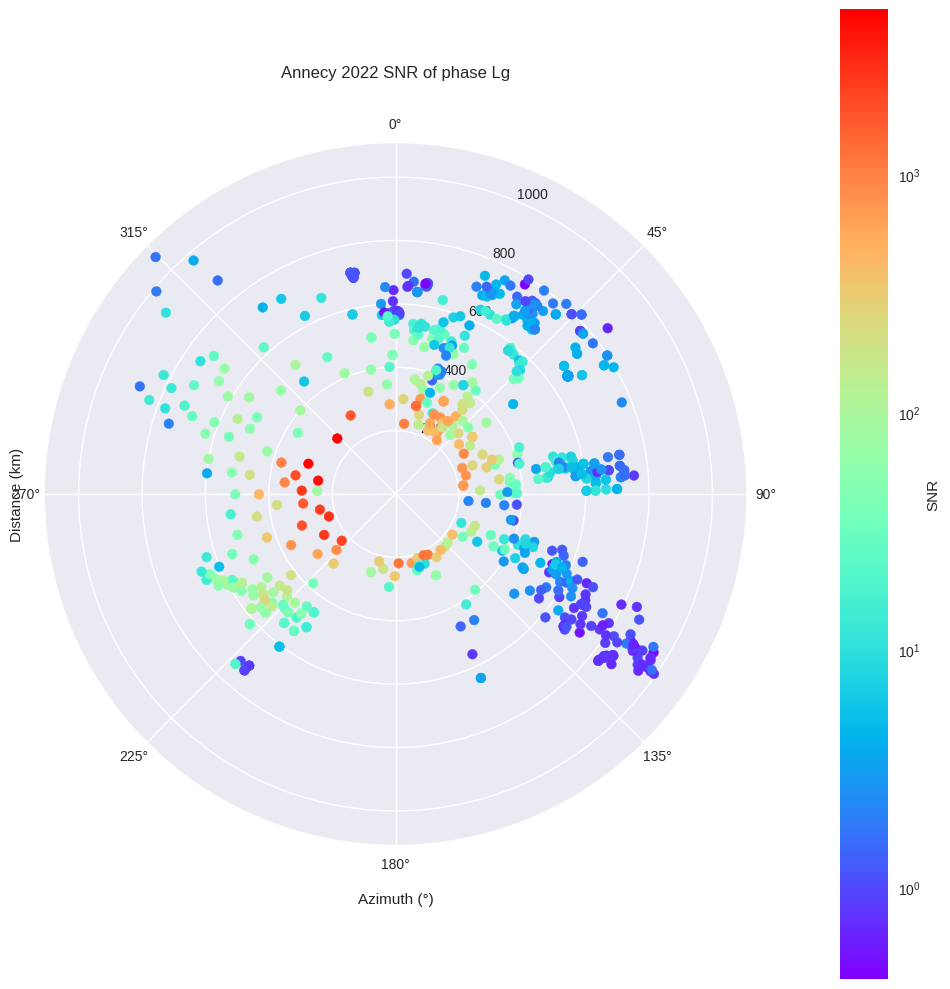

In [28]:
snr_az = snr_azimuth(stations_with_snr, column=13, barlabel="SNR", xlabel="Azimuth (°)", ylabel="Distance (km)", title="SNR", event_name='Annecy 2022', savefig=True, show=True)